<br/>
<br/>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db"> <u>Modélisation Du Sinistre </u></h1>
<br/>
    

### Entrainement du modèle d'autoencodeur

In [6]:
import numpy as np
import random
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import os

base_Edu_cleaned est le dataFrame qui a été exporté dans le fichier préparation avant les réductions des dimensions

In [2]:
base_assu= pd.read_parquet("C:/Users/damso/Documents/data/base_assu.parquet")

base_Edu=pd.read_csv("C:/Users/damso/Documents/data/base_Edu_cleaned.csv")

base_AE=base_Edu.select_dtypes(exclude="datetime").drop(columns="unique_learner_id",axis=1).head(30000)

In [3]:
base_Edu1 = pd.read_parquet("C:/Users/damso/Documents/data/base_Edu.parquet")

columns_delete= list(set(base_Edu1.columns) - set(base_Edu.columns))
len(columns_delete)

104

In [4]:
columns_delete

['time_q75_training_count_avg',
 'serie_q75_exam_score_pct_std_avg',
 'time_q50_training_count_avg',
 'serie_q100_training_score_pct_avg_avg',
 'time_q100_training_score_pct_std_avg',
 'serie_q75_exam_score_pct_avg_avg',
 'avg_correct_answer_rate_last_7d_before_theory_exam',
 'score_at_registration',
 'time_q25_exam_score_pct_std_avg',
 'nb_distinct_instructor',
 'time_q50_theme_count_avg',
 'delay_booking_creation_annulation_days_min',
 'delay_annulation_lesson_days_max',
 'time_q75_exam_count_avg',
 'time_q100_exam_score_pct_std_avg',
 'time_q75_training_score_pct_avg_avg',
 'proportion_activities_last_3d_before_theory_exam',
 'time_q100_theme_score_pct_avg_avg',
 'nb_cancellations',
 'serie_q25_training_score_pct_std_avg',
 'serie_q100_exam_score_pct_avg_avg',
 'serie_q100_theme_score_pct_avg_avg',
 'time_q50_theme_score_pct_std_avg',
 'time_q75_exam_score_pct_std_avg',
 'delay_between_lesson_hours_max',
 'serie_q100_theme_score_pct_std_avg',
 'serie_q25_exam_score_pct_avg_avg',
 't

In [5]:


# === 1. Fixer les graines pour la reproductibilité ===
seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# === 2. Préparation des données ===
# Récupérer les colonnes numériques et catégoriques
numerical_cols = base_AE.select_dtypes(include=['int', 'float']).columns
categorical_cols = base_AE.select_dtypes(include=['category', 'object']).columns

# Encodage des variables catégoriques avec OneHotEncoder
oneencoder = OneHotEncoder(sparse_output=False)
encoded_cats = oneencoder.fit_transform(base_AE[categorical_cols])

# Récupérer les noms des colonnes générées par OneHotEncoder
encoded_cat_columns = oneencoder.get_feature_names_out(categorical_cols)

# Centrage et réduction des variables numériques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(base_AE[numerical_cols])

# Fusionner les données encodées et normalisées
final_data = np.hstack([encoded_cats, scaled_nums])

# Concaténer les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

Epoch 1/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0447 - val_loss: 0.0306
Epoch 2/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0299 - val_loss: 0.0302
Epoch 3/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0295 - val_loss: 0.0298
Epoch 4/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0292 - val_loss: 0.0296
Epoch 5/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0289 - val_loss: 0.0293
Epoch 6/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0287 - val_loss: 0.0291
Epoch 7/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0284 - val_loss: 0.0289
Epoch 8/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0282 - val_loss: 0.0287
Epoch 9/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0281 - val_loss: 0.0286
Epoch 10/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0279 - val_loss: 0.0285
Epoch 11/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0278 - val_loss: 0.0284
Epoch 12/50
730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/st

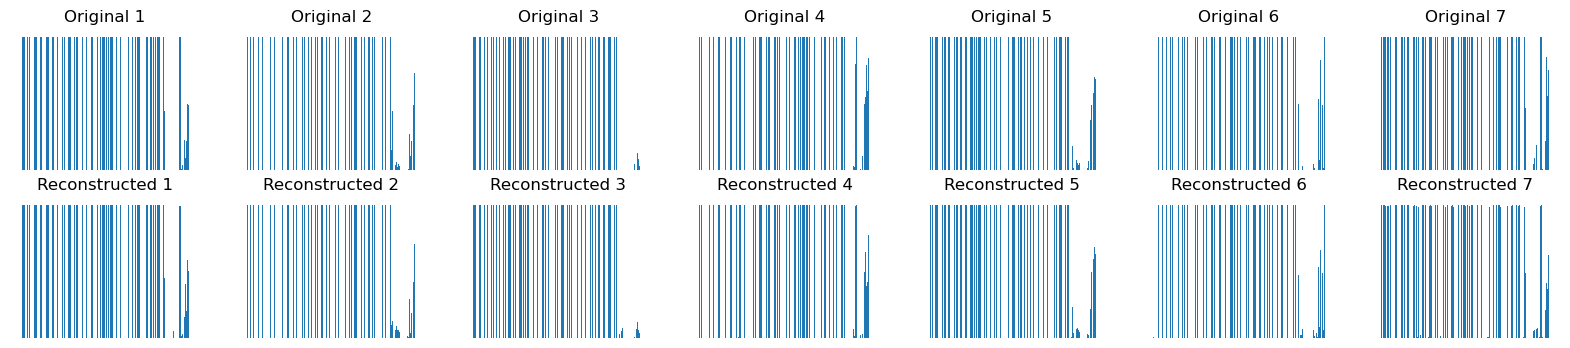

Erreur moyenne de reconstruction : 0.0280


In [33]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test = train_test_split(final_data, test_size=0.3, random_state=seed_value)

# Dimensions de l'entrée
#input_dim = x_train.shape[1]

# === 2. Définition de l'autoencodeur ===
input_dim = x_train.shape[1]  # Assurez-vous que x_train est bien défini
encoding_dim = 3

# Initialisation déterministe des poids
initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

input_img = Input(shape=(input_dim,))
# Encodeur
Hidden1 = Dense(358, activation='relu', kernel_initializer=initializer)(input_img)
#Hidden2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden1)
#Hidden3 = Dense(64, activation='relu', kernel_initializer=initializer)(Hidden2)
encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden1)

# Décodeur
Hidden_output1 = Dense(358, activation='relu', kernel_initializer=initializer)(encoded)
#Hidden_output2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden_output1)
#Hidden_output3 = Dense(256, activation='relu', kernel_initializer=initializer)(Hidden_output2)
decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output1)#Plus touche

# Modèle autoencodeur
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Modèle de l'encodeur seul
encoder = Model(input_img, encoded)

# Représentations encodées (latent space)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# === 4. Visualisation des performances ===
n = 7
plt.figure(figsize=(20, 4))

for i in range(n):
    # Données originales
    ax = plt.subplot(2, n, i + 1)
    plt.bar(range(len(x_test[i])), x_test[i])
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.bar(range(len(decoded_imgs[i])), decoded_imgs[i])
    plt.title(f"Reconstructed {i+1}")
    plt.axis('off')

plt.show()

# Analyse des erreurs de reconstruction
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=1)
print(f"Erreur moyenne de reconstruction : {np.mean(reconstruction_error):.4f}")

### importation de la base

In [37]:
#url = "C:/Users/damso/Documents/data/base_Edu.parquet"
df=base_assu
df.describe().T

,count,mean,min,25%,50%,75%,max,std
unique_learner_id,69398.0,3754957169445755.5,-9222849458566410240.0,-4598777253173660672.0,540777374478605.5,4626702790680507392.0,9223326892717478912.0,5329710092417094656.0
learner_id,69398.0,1583879.345644,364.0,728669.5,1497337.5,2308807.0,4457818.0,1001226.659264
days_between_signup_and_first_activity,69398.0,215.312142,0.0,0.0,27.0,269.0,3491.0,369.320062
days_between_order_and_first_activity,69398.0,141.204213,-2304.0,0.0,2.0,139.0,2912.0,338.464838
days_between_first_and_last_activities,69398.0,344.318583,0.0,85.0,241.0,489.0,2959.0,348.980921
...,...,...,...,...,...,...,...,...
var_Assurance11,69398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_Assurance12,69398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_Assurance13,69398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
var_Assurance14,69398.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# restriction de la base Edu aux variables communes aux bases ASU et EDU
# pour voir les variables qui ne sont pas communes aux deux bases dans la base asu 
columns=[] # contient les colonnes communes aux deux bases 
for column in base_Edu1.columns:
    if column in df.columns:
        columns.append(column)
#base_AE=base_AE[columns]
df.drop(columns, axis=1)


,learner_id,job_number,unique_learner_id_1,days_between_signup_and_first_activity_1,days_between_order_and_first_activity_1,days_between_first_and_last_activities_1,chapter_before_success_count_1,serie_before_success_count_1,quiz_before_success_count_1,theory_activities_total_1,...,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
0,2032674,5952452787,-5911177134761577615,157,157,195,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
1,893514,6956583814,8022228279541171063,7,8,819,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
2,2858364,1547176297,4508976855497020988,0,-32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1362204,3464728867,2395000730355774468,0,0,376,0,0,0,288,...,0,1,3,0,0,0,0,0,0,0
4,1054230,1534163688,1056703805299986938,64,0,691,0,109,0,156,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69393,3793717,2234733812,-872146316430440559,0,0,372,0,57,18,193,...,0,0,0,0,0,0,0,0,0,0
69394,2775978,1784701608,-3415706474168471139,109,109,270,0,50,0,51,...,0,0,0,0,0,0,0,0,0,0
69395,2102507,7135995107,-1958338314080661076,672,665,613,0,93,321,603,...,0,0,0,0,0,0,0,0,0,0
69396,2862021,1866260241,-7394860117143701634,113,114,76,0,0,0,120,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#suppression des colonnes doubles
columns_double=df.drop(columns, axis=1).drop(['learner_id',	'job_number','unique_learner_id_1','var_Assurance0', 'var_Assurance1', 'var_Assurance2', 'var_Assurance3',
       'var_Assurance4', 'var_Assurance5', 'var_Assurance6', 'var_Assurance7',
       'var_Assurance8', 'var_Assurance9', 'var_Assurance10',
       'var_Assurance11', 'var_Assurance12', 'var_Assurance13',
       'var_Assurance14', 'var_Assurance15'],axis=1).columns

df=df.drop(columns_double, axis=1)
df.head()

,unique_learner_id,learner_id,job_number,days_between_signup_and_first_activity,days_between_order_and_first_activity,days_between_first_and_last_activities,chapter_before_success_count,serie_before_success_count,quiz_before_success_count,theory_activities_total,...,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15
0,-5911177134761577615,2032674,5952452787,157,157,195,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
1,8022228279541171063,893514,6956583814,7,8,819,0,0,0,26,...,0,0,0,0,0,0,0,0,0,0
2,4508976855497020988,2858364,1547176297,0,-32,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2395000730355774468,1362204,3464728867,0,0,376,0,0,0,288,...,0,1,3,0,0,0,0,0,0,0
4,1056703805299986938,1054230,1534163688,64,0,691,0,109,0,156,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# supression des lignes doubles
df = df.drop_duplicates()
df.shape

(66692, 489)

In [44]:
df.columns

Index(['unique_learner_id', 'learner_id', 'job_number',
       'days_between_signup_and_first_activity',
       'days_between_order_and_first_activity',
       'days_between_first_and_last_activities',
       'chapter_before_success_count', 'serie_before_success_count',
       'quiz_before_success_count', 'theory_activities_total',
       ...
       'var_Assurance6', 'var_Assurance7', 'var_Assurance8', 'var_Assurance9',
       'var_Assurance10', 'var_Assurance11', 'var_Assurance12',
       'var_Assurance13', 'var_Assurance14', 'var_Assurance15'],
      dtype='object', length=489)

In [45]:
# on supprime les variables qui ont été supprimer dans la base edu, ainsi que les variables inutiles
df_new=df.drop(columns_delete + ["unique_learner_id","learner_id","job_number","first_theory_activity_date",'unique_learner_id_1'], axis=1)


In [46]:
print(df_new.select_dtypes("int").isnull().any().sum()," variables de type int ont des valeurs manquantes")
print(df_new.select_dtypes("float").isnull().any().sum()," variables de type float ont des valeurs manquantes")
print(df_new.select_dtypes("boolean").isnull().any().sum()," variables de type boolean ont des valeurs manquantes")
print(df_new.select_dtypes("datetime").isnull().any().sum()," variables de type datetime ont des valeurs manquantes")

24  variables de type int ont des valeurs manquantes
24  variables de type float ont des valeurs manquantes
253  variables de type boolean ont des valeurs manquantes
0  variables de type datetime ont des valeurs manquantes


In [47]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs booléennes et <NA>
    return col.map(mapping)
colboo=df_new.select_dtypes("boolean").columns
for col in colboo:
    df_new[col] = encode_column_with_na(df_new[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories

In [48]:
miss_quant=df_new.select_dtypes(include=["int","float"]).isnull().sum()/len(df_new)
miss_quant[miss_quant>0.20].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

In [49]:
#imputation par la médiane
col=df_new.select_dtypes(exclude='category').columns
df_new[col] = df_new[col].fillna(df_new[col].median())

In [50]:
var_assurance=['var_Assurance0', 'var_Assurance1', 'var_Assurance2', 'var_Assurance3',
       'var_Assurance4', 'var_Assurance5', 'var_Assurance6', 'var_Assurance7',
       'var_Assurance8', 'var_Assurance9', 'var_Assurance10',
       'var_Assurance11', 'var_Assurance12', 'var_Assurance13',
       'var_Assurance14', 'var_Assurance15']

### Projection des variables dans l'espace latent

In [51]:
#on duplique l'observation pour qu'il n'y ait pas d'erreur lors de la division des données en données d'entrainement et données de test car la 
# stratification voudrait au moins deux observations par classe
df_duplicate = df_new[df_new["var_Assurance2"]==3]  # Sélection des lignes à dupliquer
df_new = pd.concat([df_new, df_duplicate], ignore_index=True)
df_new.shape

(66693, 380)

In [52]:
# traitement des données de la base ASU en entrée du modèle

X_to_predict= df_new.drop(var_assurance, axis=1)
# Récupérer les colonnes numériques et catégoriques
numerical_cols = X_to_predict.select_dtypes(include=['int', 'float']).columns
categorical_cols = X_to_predict.select_dtypes(include=['category', 'object','boolean']).columns

# Encodage des variables catégoriques avec OneHotEncoder
oneencoder = OneHotEncoder(sparse_output=False)
encoded_cats = oneencoder.fit_transform(X_to_predict[categorical_cols])

# Récupérer les noms des colonnes générées par OneHotEncoder
encoded_cat_columns = oneencoder.get_feature_names_out(categorical_cols)

# Centrage et réduction des variables numériques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(X_to_predict[numerical_cols])

# Fusionner les données encodées et normalisées
final_data = np.hstack([encoded_cats, scaled_nums])

# Concaténer les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

# construction du code latent pour la base ASU, projection dans l'espace latent de l'auto encodeur construit précédemment
encoded_imgs = encoder.predict(final_data)


2085/2085 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step


### **Prédiction du risque corporel**

In [57]:
#construction de la nouvelle base
nom_facteur=["facteur{}".format(i) for i in np.arange(1,4)]
col_to_delete = base_AE.columns.drop("first_theory_activity_date")
base = df_new.drop(col_to_delete, axis=1)
base[nom_facteur]=encoded_imgs
base.head()

,var_Assurance0,var_Assurance1,var_Assurance2,var_Assurance3,var_Assurance4,var_Assurance5,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15,facteur1,facteur2,facteur3
0,80,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.837339,2.159837,29.258821
1,3,1.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-8.336267,-0.476025,22.595692
2,78,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.800313,3.490731,29.080462
3,44,2.00,0,2,0,0,0,1,3,0,0,0,0,0,0,0,-8.192768,-1.574194,34.350758
4,91,1.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.790425,10.415071,17.511938


In [59]:
 # suppression des variables constantes
base=base.drop(["var_Assurance11","var_Assurance12","var_Assurance13","var_Assurance14"],axis=1)

Etant donnée que la variable cible est une variable de comptage, on fera l'hypothèse qu'elle suit une loi discrète classique. 

In [60]:
df_new["var_Assurance2"].mean()

0.006642376261376756

In [61]:
df_new["var_Assurance2"].var()

0.007348069143468633

# exportons à présent les données que nous utiliserons pour nos modélisation

In [62]:
base.to_csv("C:/Users/damso/Documents/data/base_model.csv", index=False,header=True,sep=";")

Etant donnée que la différence entre la moyenne et la variance de cette variable est négligeable (pas de surdispersion), nous allons considéré une distribution de poisson avec une fonction de lien logarithmique pour le modèle linéaire généralisé. 

<br/>
<br/>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db"> <u> Implémentation d'un GLM poisson(lisa)</u></h2>
<br/>
    

<br/>
<br/>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db"> <u> Implémentation d'un modèle XGBoost(briand)</u></h2>
<br/>
    

In [7]:
base = pd.read_csv("C:/Users/damso/Documents/data/base_model.csv",sep=";")

In [8]:
base = pd.DataFrame(base)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66693 entries, 0 to 66692
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   var_Assurance0   66693 non-null  int64  
 1   var_Assurance1   66693 non-null  float64
 2   var_Assurance2   66693 non-null  int64  
 3   var_Assurance3   66693 non-null  int64  
 4   var_Assurance4   66693 non-null  int64  
 5   var_Assurance5   66693 non-null  int64  
 6   var_Assurance6   66693 non-null  int64  
 7   var_Assurance7   66693 non-null  int64  
 8   var_Assurance8   66693 non-null  int64  
 9   var_Assurance9   66693 non-null  int64  
 10  var_Assurance10  66693 non-null  int64  
 11  var_Assurance15  66693 non-null  int64  
 12  facteur1         66693 non-null  float64
 13  facteur2         66693 non-null  float64
 14  facteur3         66693 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 7.6 MB


In [9]:
base.nunique()

var_Assurance0       101
var_Assurance1       356
var_Assurance2         4
var_Assurance3         6
var_Assurance4         6
var_Assurance5         3
var_Assurance6         4
var_Assurance7         5
var_Assurance8         8
var_Assurance9         3
var_Assurance10        6
var_Assurance15        6
facteur1           66609
facteur2           66610
facteur3           66556
dtype: int64

In [10]:
# les variables var_assurance11 ... var_assurance14 sont constantes et ne contiennent que des 0
bodily=base["var_Assurance2"]
material=base["var_Assurance3"]
base=base.drop(["var_Assurance2","var_Assurance3"],axis=1)
base = base.astype(np.float64)
#base = np.asarray(base, dtype=np.float64)


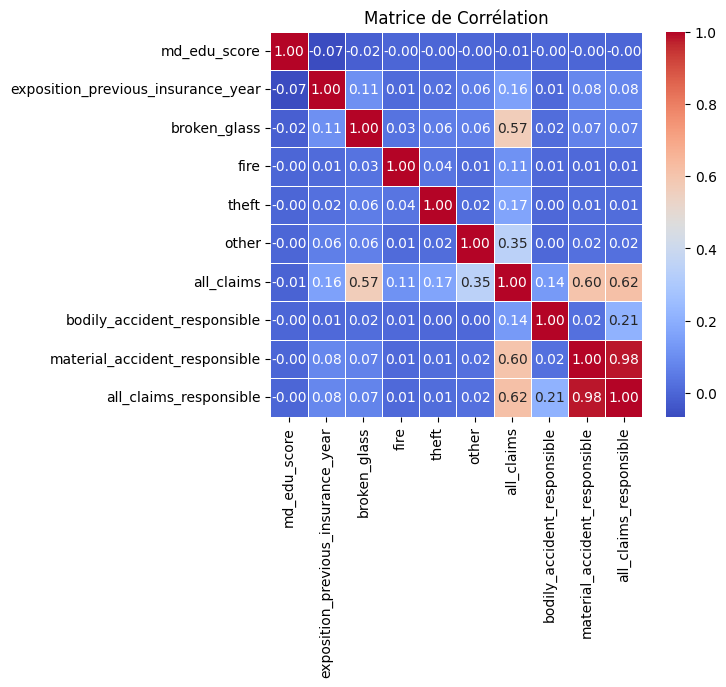

In [11]:
base_corr=base.drop(["facteur1","facteur2","facteur3"], axis=1)
base_corr.columns=["md_edu_score","exposition_previous_insurance_year","broken_glass","fire","theft","other","all_claims","bodily_accident_responsible","material_accident_responsible","all_claims_responsible"]
corr_matrix=base_corr.corr()
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

Bien que la variable var_Assurance15 (all_claims_responsible) est tres fortement correlée avec la variable var_Assurance10("material_accident_responsible") cela ne pourrait entrainer un problème de multicolinéarité dans le modèle car il est basé sur des arbres de décision. 

In [12]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(base, bodily, test_size=0.3, stratify=bodily, random_state=40)
#x_train = scaler.fit_transform(x_train)
y_train.value_counts()

var_Assurance2
0    46391
1      279
2       13
3        2
Name: count, dtype: int64

In [37]:


# Calcul de la variance de chaque ligne pour var_Assurance2
variance_var_assu2 = bodily.var()

# Calcul de la moyenne de var_Assurance2
mean_var_assu2 = bodily.mean()

# Afficher les résultats
print(f"Variance de var_Assurance2 : {variance_var_assu2}")
print(f"Moyenne de var_Assurance2 : {mean_var_assu2}")

# Comparaison
if variance_var_assu2 > mean_var_assu2:
    print("La variance est supérieure à la moyenne.")
elif variance_var_assu2 < mean_var_assu2:
    print("La moyenne est supérieure à la variance.")
else:
    print("La variance et la moyenne sont égales.")

Variance de var_Assurance2 : 0.007348069143468633
Moyenne de var_Assurance2 : 0.006642376261376756
La variance est supérieure à la moyenne.


Puisque la variance de Bodily est supérieure à sa moyenne, nous pouvons envisager ajuster le modèle avec une binomiale négative

<h3>Prédiction de bodily(var_Assurance2)</h3>

In [ ]:
!pip install xgboost

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Supposons que `base` soit déjà nettoyé et prêt à l'emploi
# On va entraîner XGBoost pour prédire `bodily`
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entraînement XGBoost
xgb_model.fit(x_train, y_train)

# Extraire les prédictions ou probabilités comme features
xgb_features_train = xgb_model.predict_proba(x_train)
xgb_features_test = xgb_model.predict_proba(x_test)


c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:21:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Supposons que tu as déjà entraîné ton modèle XGBoost :
# model_xgb.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = xgb_model.predict(x_test)

# Accuracy globale
print("Accuracy :", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))


Accuracy : 0.9975509796081568
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19882
           1       0.93      0.64      0.76       120
           2       1.00      0.17      0.29         6

    accuracy                           1.00     20008
   macro avg       0.98      0.60      0.68     20008
weighted avg       1.00      1.00      1.00     20008

Matrice de confusion :
[[19881     1     0]
 [   43    77     0]
 [    0     5     1]]


<p>
le modèle est parfait pour la classe 0 <br/>
1 prédiction sur 3 est fausse pour la classe 1<br/>
2 prédictions sur 3 sont fausses pour la classe 2
</p>

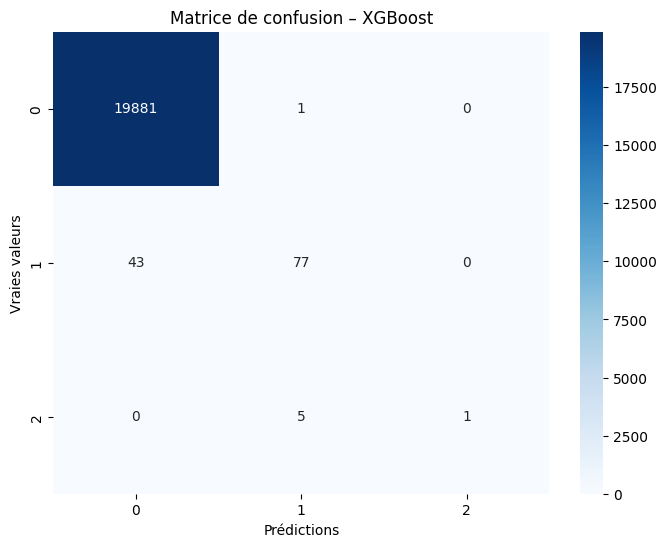

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))  # pour s'assurer que les classes soient bien ordonnées

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion – XGBoost')
plt.show()


Le modèle xgboost construit est très performant(accuracy =0.98) pour predire la classe 0 mais moins sur les autres classe à cause du déséquilibre des classes , nous allons appliquer un GLM à ces sorties afin de réduire le biais due au déséquilibre des classes.

In [38]:


# Calcul de la variance de chaque ligne pour var_Assurance2
variance_var_assu2 = bodily.var()

# Calcul de la moyenne de var_Assurance2
mean_var_assu2 = bodily.mean()

# Afficher les résultats
print(f"Variance de var_Assurance2 : {variance_var_assu2}")
print(f"Moyenne de var_Assurance2 : {mean_var_assu2}")

# Comparaison
if variance_var_assu2 > mean_var_assu2:
    print("La variance est supérieure à la moyenne.")
elif variance_var_assu2 < mean_var_assu2:
    print("La moyenne est supérieure à la variance.")
else:
    print("La variance et la moyenne sont égales.")

Variance de var_Assurance2 : 0.007348069143468633
Moyenne de var_Assurance2 : 0.006642376261376756
La variance est supérieure à la moyenne.


In [ ]:
!pip install statsmodels

### application d'un modèle multinomiale aux sorties du modèle XGBoost

In [53]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit
import pandas as pd

# Ajouter une constante (interception) à l'entrée du GLM
xgb_train_glm = sm.add_constant(xgb_features_train)
xgb_test_glm = sm.add_constant(xgb_features_test)

# Modèle multinomial (multiclasse)
glm_model = MNLogit(y_train, xgb_train_glm)
glm_result = glm_model.fit()

# Résumé statistique du modèle
print(glm_result.summary())

# Prédictions
y_pred_probs = glm_result.predict(xgb_test_glm)
y_pred = np.argmax(y_pred_probs, axis=1)



c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\discrete\discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


Optimization terminated successfully.
         Current function value: nan
         Iterations 17
                          MNLogit Regression Results                          
Dep. Variable:         var_Assurance2   No. Observations:                46685
Model:                        MNLogit   Df Residuals:                    46670
Method:                           MLE   Df Model:                           12
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                     nan
Time:                        12:21:15   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -1848.1
Covariance Type:            nonrobust   LLR p-value:                       nan
var_Assurance2=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                   nan        nan        nan        nan         nan         nan
x1             

In [54]:

# Évaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19882
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00         6

    accuracy                           0.99     20008
   macro avg       0.33      0.33      0.33     20008
weighted avg       0.99      0.99      0.99     20008



c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<p>
le modèle s'est éfondré et ne prédit que la première classe désormais
</p>
<br/>

### application d'une regression logistique avec pondération des classes

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entraînement du GLM avec class_weight='balanced'
glm_model1 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=40,
    class_weight='balanced'
)

# Fit sur les features issues de XGBoost
glm_model1.fit(xgb_features_train, y_train)

# Prédictions (classes directement)
y_pred1 = glm_model1.predict(xgb_features_test)

# Évaluation
print("Classification Report :")
print(classification_report(y_test, y_pred1))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred1))


c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19882
           1       0.93      0.64      0.76       120
           2       1.00      0.17      0.29         6

    accuracy                           1.00     20008
   macro avg       0.98      0.60      0.68     20008
weighted avg       1.00      1.00      1.00     20008

Matrice de confusion :
[[19881     1     0]
 [   43    77     0]
 [    0     5     1]]


le modèle prédit des valeurs positives représentant des comptages attendus.
Le modèle prédit très mal les classes déséquilibrés.

### Application d'une regression(GLM binomial négatif) aux sorties de XGBoost

In [ ]:

# Évaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

In [41]:
import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial
# Ajout de constante (intercept)
xgb_train_glm = sm.add_constant(xgb_features_train)
xgb_test_glm = sm.add_constant(xgb_features_test)

# GLM multinomial (famille Binomial pour classification binaire, ou multinomiale si besoin)
glm_model = sm.GLM(y_train, xgb_train_glm, family=NegativeBinomial())

glm_result = glm_model.fit()

# Résumé du modèle
print(glm_result.summary())

# Prédictions
pred_probs = glm_result.predict(xgb_test_glm)
pred_classes = (pred_probs > 0.5).astype(int)  # ou np.argmax() pour multi-classes


c:\Users\damso\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:         var_Assurance2   No. Observations:                46685
Model:                            GLM   Df Residuals:                    46680
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -496.97
Date:                Thu, 10 Apr 2025   Deviance:                       161.74
Time:                        11:47:42   Pearson chi2:                     365.
No. Iterations:                     9   Pseudo R-squ. (CS):            0.05715
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.921e+05   2.15e+06      0.089      0.9

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Prédictions continues
y_pred = glm_result.predict(xgb_test_glm)

# Évaluation
print("R² :", r2_score(y_test, y_pred))
print("RMSE(ecart-type) :", np.sqrt(mean_squared_error(y_test, y_pred)))  # remplacement ici
print("MAE(variance) :", mean_absolute_error(y_test, y_pred))


R² : 0.41744600456543257
RMSE(ecart-type) : 0.06455506114227136
MAE(variance) : 0.005275955698361583


ce modèle semble produire de bons résultats mais n'est pas adapté pour une prédiction de variables catégorielles car c'est une regression , donc les sorties ne seront pas toujours entières. Nous allons donc opter pour un modèle de classification multiclasse(MNLogit)

<b>
Puisque nous n'arrivons à améliorer la précision du modèle xgboost, nous allons faire un reéchantillonnage avant les prédictions
</b>

### Utisation du modèle après reéchantillonnage rééchantillonage SMOTE

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
#Création du split en respectant les proportions des classes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_index, test_index in sss.split(base, bodily):
    X_train, X_test = base.iloc[train_index], base.iloc[test_index]
    y_train, y_test = bodily.iloc[train_index], bodily.iloc[test_index]

#Vérification de la distribution des classes
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

var_Assurance2
0    0.993702
1    0.005979
2    0.000281
3    0.000037
Name: proportion, dtype: float64
var_Assurance2
0    0.993703
1    0.005997
2    0.000300
Name: proportion, dtype: float64


### **Prédiction du risque matériel(var_Assurance3)** 

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
x_train2, x_test2, y_train2, y_test2 = train_test_split(base, material, test_size=0.3, stratify=material, random_state=40)
#x_train = scaler.fit_transform(x_train)
y_train2.value_counts()

In [ ]:


# Calcul de la variance de chaque ligne pour var_Assurance2
variance_var_assu3 = material.var()

# Calcul de la moyenne de var_Assurance2
mean_var_assu3 = material.mean()

# Afficher les résultats
print(f"Variance de var_Assurance3 : {variance_var_assu3}")
print(f"Moyenne de var_Assurance3 : {mean_var_assu3}")

# Comparaison
if variance_var_assu2 > mean_var_assu2:
    print("La variance est supérieure à la moyenne.")
elif variance_var_assu2 < mean_var_assu2:
    print("La moyenne est supérieure à la variance.")
else:
    print("La variance et la moyenne sont égales.")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Supposons que `base` soit déjà nettoyé et prêt à l'emploi
# On va entraîner XGBoost pour prédire `bodily`
xgb_model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Entraînement XGBoost
xgb_model2.fit(x_train2, y_train2)

# Extraire les prédictions ou probabilités comme features
xgb_features_train2 = xgb_model2.predict_proba(x_train2)
xgb_features_test2 = xgb_model2.predict_proba(x_test2)


<br/>
<br/>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db"> <u> Implémentation du Zero Inflated Neuronal Network (ZINN) (deeson)</u></h2>
<br/>
    

## Construction du ZINN

In [ ]:
#!pip install torch
import pandas as pd
AssuAE=pd.read_csv('/home/onyxia/work/bas_glm.csv',sep=';')

In [ ]:
AssuAE

,var_Assurance0,var_Assurance1,var_Assurance2,var_Assurance3,var_Assurance4,var_Assurance5,var_Assurance6,var_Assurance7,var_Assurance8,var_Assurance9,var_Assurance10,var_Assurance11,var_Assurance12,var_Assurance13,var_Assurance14,var_Assurance15,facteur1,facteur2,facteur3
0,80,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.415548,21.419186,31.390768
1,3,1.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.509951,10.637355,34.872350
2,78,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.539669,23.029255,33.702557
3,44,2.00,0,2,0,0,0,1,3,0,0,0,0,0,0,0,-4.133618,17.098064,46.019650
4,91,1.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.750637,23.080462,29.997705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66688,46,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.858546,6.619362,6.504601
66689,91,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.155061,1.959979,3.016555
66690,40,0.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.955491,1.475969,0.130758
66691,83,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.310589,8.584696,-0.277912


In [ ]:

mapping_noms = {
    f"var_Assurance{i}": nom
    for i, nom in enumerate([
        'md_edu_score', 'exposition_previous_insurance_year', 'bodily_accident', 
        'material_accident', 'broken_glass', 'fire', 'theft', 'other', 
        'all_claims', 'bodily_accident_responsible', 'material_accident_responsible', 
        'broken_glass_responsible', 'fire_responsible', 'theft_responsible', 
        'other_responsible', 'all_claims_responsible'
    ])
}

print(mapping_noms)

{'var_Assurance0': 'md_edu_score', 'var_Assurance1': 'exposition_previous_insurance_year', 'var_Assurance2': 'bodily_accident', 'var_Assurance3': 'material_accident', 'var_Assurance4': 'broken_glass', 'var_Assurance5': 'fire', 'var_Assurance6': 'theft', 'var_Assurance7': 'other', 'var_Assurance8': 'all_claims', 'var_Assurance9': 'bodily_accident_responsible', 'var_Assurance10': 'material_accident_responsible', 'var_Assurance11': 'broken_glass_responsible', 'var_Assurance12': 'fire_responsible', 'var_Assurance13': 'theft_responsible', 'var_Assurance14': 'other_responsible', 'var_Assurance15': 'all_claims_responsible'}


In [ ]:
AssuAE=AssuAE.rename(columns=mapping_noms)
AssuAE

,md_edu_score,exposition_previous_insurance_year,bodily_accident,material_accident,broken_glass,fire,theft,other,all_claims,bodily_accident_responsible,material_accident_responsible,broken_glass_responsible,fire_responsible,theft_responsible,other_responsible,all_claims_responsible,facteur1,facteur2,facteur3
0,80,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.415548,21.419186,31.390768
1,3,1.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.509951,10.637355,34.872350
2,78,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.539669,23.029255,33.702557
3,44,2.00,0,2,0,0,0,1,3,0,0,0,0,0,0,0,-4.133618,17.098064,46.019650
4,91,1.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.750637,23.080462,29.997705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66688,46,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.858546,6.619362,6.504601
66689,91,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.155061,1.959979,3.016555
66690,40,0.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.955491,1.475969,0.130758
66691,83,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.310589,8.584696,-0.277912


In [ ]:
AssuAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66693 entries, 0 to 66692
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   md_edu_score                        66693 non-null  int64  
 1   exposition_previous_insurance_year  66693 non-null  float64
 2   bodily_accident                     66693 non-null  int64  
 3   material_accident                   66693 non-null  int64  
 4   broken_glass                        66693 non-null  int64  
 5   fire                                66693 non-null  int64  
 6   theft                               66693 non-null  int64  
 7   other                               66693 non-null  int64  
 8   all_claims                          66693 non-null  int64  
 9   bodily_accident_responsible         66693 non-null  int64  
 10  material_accident_responsible       66693 non-null  int64  
 11  broken_glass_responsible            66693

Nous commençons ici par définir la classe ZeroInflatedNN, qui représente un modèle de réseau de
neurones zéro-inflated. Ce modèle permet de prédire à la fois la probabilité de "zéros structurels" et le taux Poisson pour les observations non-nulles, afin de mieux gérer des données où les zéros sont surreprésentés et d’améliorer l’estimation des événements pour les observations positives.

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import NegativeBinomial, Bernoulli

# Fix random seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

class ZeroInflatedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(ZeroInflatedNN, self).__init__()

        # Shared hidden layers
        self.shared_net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Zero-inflation head (logistic regression)
        self.zero_head = nn.Sequential(
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Outputs p(zero)
        )
        
        # Count head for Negative Binomial (predicts μ and r)
        self.count_head = nn.Linear(hidden_dim, 2)  # μ (mean) and r (dispersion)

    def forward(self, x):
        features = self.shared_net(x)
        
        # Zero-inflation part
        p_zero = self.zero_head(features).squeeze(-1)
        
        # Negative Binomial part
        count_params = self.count_head(features)
        mu = F.softplus(count_params[:, 0]) + 1e-4  # ensure positivity
        r = F.softplus(count_params[:, 1]) + 1e-4
        
        return p_zero, mu, r
    
    def loss(self, p_zero, mu, r, target):
        # Negative Binomial PMF (NB(y; μ, r))
        nb_dist = NegativeBinomial(total_count=r, probs=r/(r + mu + 1e-8))
        nb_pmf = torch.exp(nb_dist.log_prob(target))  # NB(y)
        
        # Zero-Inflation: π·I(y=0) + (1-π)·NB(y)
        likelihood = torch.where(
            target == 0,
            p_zero + (1 - p_zero) * nb_pmf,  # π + (1-π)·NB(0)
            (1 - p_zero) * nb_pmf             # (1-π)·NB(y)
        )
        
        return -torch.log(likelihood + 1e-8).mean()  # Negative log-likelihood

    def predict(self, x, sample=False):
        """
        Generate predictions from the ZINB model.
        
        Args:
            x: Input features
            sample: If True, sample from ZINB distribution.
                    If False, return expected value E[Y] = (1-π)*μ.
        """
        self.eval()
        with torch.no_grad():
            p_zero, mu, r = self(x)
            
            if sample:
                # Sample from Bernoulli (zero-inflation)
                is_zero = torch.rand_like(p_zero) < p_zero
                
                # Sample from Negative Binomial (counts)
                nb_dist = NegativeBinomial(
                    total_count=r,
                    probs=r / (r + mu + 1e-8)  # Avoid division by zero
                )
                counts = nb_dist.sample()
                
                # Apply zero-inflation: structural zeros replace NB samples
                predictions = torch.where(is_zero, 
                                        torch.zeros_like(counts), 
                                        counts)
            else:
                # Expected value of ZINB: E[Y] = (1-π)*μ
                predictions = (1 - p_zero) * mu
                
            return predictions.long()

In [ ]:
def train_zinn(model, X_train, y_train, X_val=None, y_val=None, epochs=100, lr=0.01, 
              verbose=True, early_stopping=False, patience=20, seed=42):
    """Train a Zero-Inflated Negative Binomial Neural Network."""
    set_seed(seed)
    device = next(model.parameters()).device
    
    # Convert data to device
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    if X_val is not None:
        X_val = X_val.to(device)
        y_val = y_val.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience//2)
    
    train_losses = []
    val_losses = []
    best_loss = float('inf')
    no_improve = 0
    best_state = None

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        
        p_zero, mu, r = model(X_train)
        loss = model.loss(p_zero, mu, r, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_losses.append(loss.item())

        # Validation
        if X_val is not None:
            model.eval()
            with torch.no_grad():
                p_zero_val, mu_val, r_val = model(X_val)
                val_loss = model.loss(p_zero_val, mu_val, r_val, y_val)
                val_losses.append(val_loss.item())
                scheduler.step(val_loss)
                
            if early_stopping:
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_state = copy.deepcopy(model.state_dict())
                    no_improve = 0
                else:
                    no_improve += 1

        if verbose and (epoch % 10 == 0 or epoch == 1 or epoch == epochs):
            log_msg = (f"Epoch {epoch:4d} | Train Loss: {loss.item():.4f} | "
                      f"μ: {mu.mean().item():.2f} | r: {r.mean().item():.2f} | "
                      f"p(zero): {p_zero.mean().item():.2f}")
            if X_val is not None:
                log_msg += f" | Val Loss: {val_loss.item():.4f}"
            print(log_msg)

        if early_stopping and no_improve >= patience:
            if verbose:
                print(f"\nEarly stopping triggered at epoch {epoch}")
            model.load_state_dict(best_state)
            break

    return model, train_losses

In [ ]:
def evaluate_zinn(model, X_test, y_test, verbose=True):
    """Evaluate a trained ZINN model."""
    device = next(model.parameters()).device
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    model.eval()
    with torch.no_grad():
        p_zero, mu, r = model(X_test)
        y_pred_mean = (1 - p_zero) * mu
        y_pred_int = torch.round(y_pred_mean).long()
        
        test_loss = model.loss(p_zero, mu, r, y_test)
        mae = torch.mean(torch.abs(y_pred_int.float() - y_test))
        
        results = {
            'loss': test_loss.item(),
            'mae': mae.item(),
            'mean_p_zero': p_zero.mean().item(),
            'mean_mu': mu.mean().item(),
            'mean_r': r.mean().item(),
            'predictions': y_pred_int.cpu().numpy()
        }
        
        if verbose:
            print("\nEvaluation Metrics:")
            print(f"- Test Loss: {results['loss']:.4f}")
            print(f"- MAE: {results['mae']:.4f}")
            print(f"- Mean p(zero): {results['mean_p_zero']:.4f}")
            print(f"- Mean μ: {results['mean_mu']:.4f}")
            print(f"- Mean r: {results['mean_r']:.4f}")
            
            print("\nPrediction Examples:")
            for i in range(min(5, len(y_test))):
                print(f"True: {y_test[i].item():4.1f} | Pred: {y_pred_int[i].item():4d}")
        
        return results

## Application du ZINN à bodily_accident

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zinb_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zinb_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="bodily_accident"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 3]
- Train zero proportion: 99.37%
- Test zero proportion: 99.37%

First 5 training samples:
Features: [-0.99  0.75 -0.29] -> Target: 0
Features: [0.4  0.43 0.03] -> Target: 0
Features: [ 2.29 -1.8  -1.85] -> Target: 0
Features: [ 0.81 -1.57 -1.71] -> Target: 0
Features: [-0.04 -0.02  0.95] -> Target: 0


Nous passons ici à l'entrainement du modèle. 

Epoch    1 | Train Loss: 0.1939 | μ: 0.73 | r: 0.67 | p(zero): 0.53


Epoch   10 | Train Loss: 0.0775 | μ: 1.01 | r: 0.42 | p(zero): 0.63
Epoch   20 | Train Loss: 0.0453 | μ: 1.69 | r: 0.18 | p(zero): 0.81
Epoch   30 | Train Loss: 0.0477 | μ: 1.98 | r: 0.13 | p(zero): 0.85
Epoch   40 | Train Loss: 0.0427 | μ: 1.76 | r: 0.18 | p(zero): 0.79
Epoch   50 | Train Loss: 0.0415 | μ: 1.58 | r: 0.23 | p(zero): 0.75
Epoch   60 | Train Loss: 0.0409 | μ: 1.60 | r: 0.23 | p(zero): 0.75
Epoch   70 | Train Loss: 0.0405 | μ: 1.67 | r: 0.21 | p(zero): 0.77
Epoch   80 | Train Loss: 0.0402 | μ: 1.68 | r: 0.21 | p(zero): 0.76
Epoch   90 | Train Loss: 0.0400 | μ: 1.67 | r: 0.22 | p(zero): 0.76
Epoch  100 | Train Loss: 0.0398 | μ: 1.68 | r: 0.22 | p(zero): 0.76


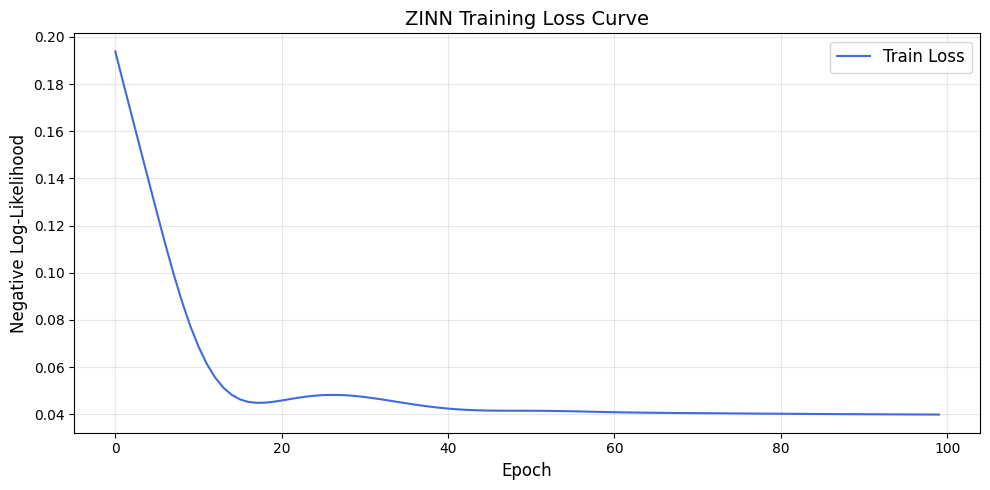


Evaluation Metrics:
- Test Loss: 0.0412
- MAE: 0.1077
- Mean p(zero): 0.7600
- Mean μ: 1.6757
- Mean r: 0.2175

Prediction Examples:
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0

Advanced Prediction Statistics:
- MAE: 0.1077
- RMSE: 0.3298
- True Zero Rate: 99.37%
- Predicted Zero Rate: 89.84%

Prediction Distribution:
  Mean: 0.10
  Std: 0.30
  Min/Max: 0/1
  Percentiles (25/50/75/90/95): [0. 0. 0. 1. 1.]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_evaluate_zinn(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZINN training and evaluation workflow.
    
    Args:
        X_train_tensor: Training features tensor
        y_train_tensor: Training targets tensor
        X_test_tensor: Test features tensor
        y_test_tensor: Test targets tensor
        hidden_dim: Hidden layer size
        epochs: Training epochs
        lr: Learning rate
        verbose: Print progress
        plot: Show training curve
        
    Returns:
        Dictionary containing model, results, and predictions
    """
    # 1. Model initialization
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN(input_dim=input_dim, hidden_dim=hidden_dim)
    
    # 2. Training with early stopping
    trained_model, train_losses = train_zinn(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    # 3. Training visualization
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZINN Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. Comprehensive evaluation
    test_results = evaluate_zinn(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    # 5. Process predictions
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    # 6. Additional metrics
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zinn(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=100,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']

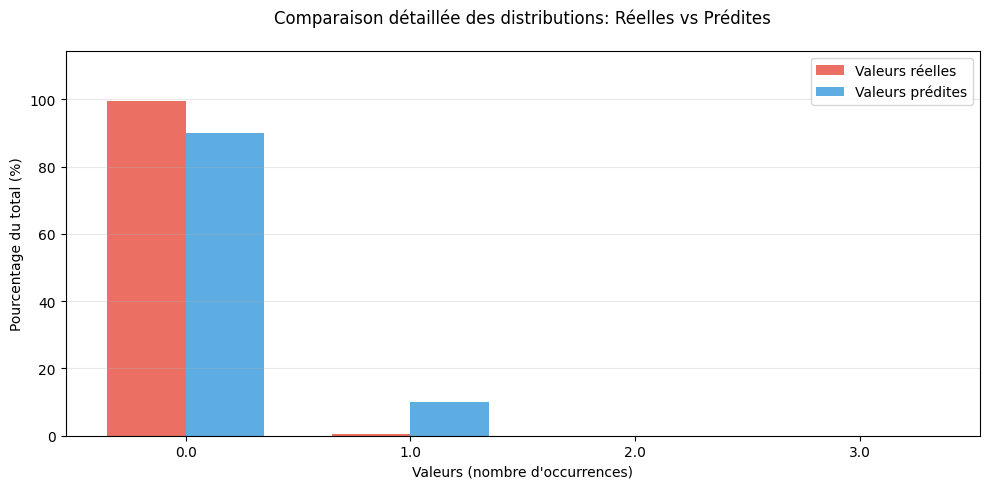


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%) 
--------------------------------------------------
0.0      |      99.37% |      89.84% |      -9.53%
1.0      |       0.58% |      10.16% |      +9.58%
2.0      |       0.04% |       0.00% |      -0.04%
3.0      |       0.01% |       0.00% |      -0.01%


In [ ]:
# 1. First ensure you have these imports at the top of your notebook
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

# 4. Get predictions and convert to numpy
with torch.no_grad():
    p_zero, mu, r = trained_model(X_test_tensor)
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()
    
    # Convert to numpy for visualization
    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 5. Now run the visualization with proper variable names
plt.figure(figsize=(10, 5))

# Get value distributions using the numpy arrays
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.unique(np.concatenate([unique_vals_real, unique_vals_pred]))

# Create relative frequencies (percentages)
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# Plot settings
bar_width = 0.35
x_pos = np.arange(len(all_values))

# Plot distributions
plt.bar(x_pos - bar_width/2, 
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs réelles', 
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2, 
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs prédites', 
        color='#3498db',
        alpha=0.8)

# Add titles and labels
plt.title("Comparaison détaillée des distributions: Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre d'occurrences)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 6. Print the detailed comparison
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10}")
print("-" * 50)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}%")

/tmp/ipykernel_439800/3433444820.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


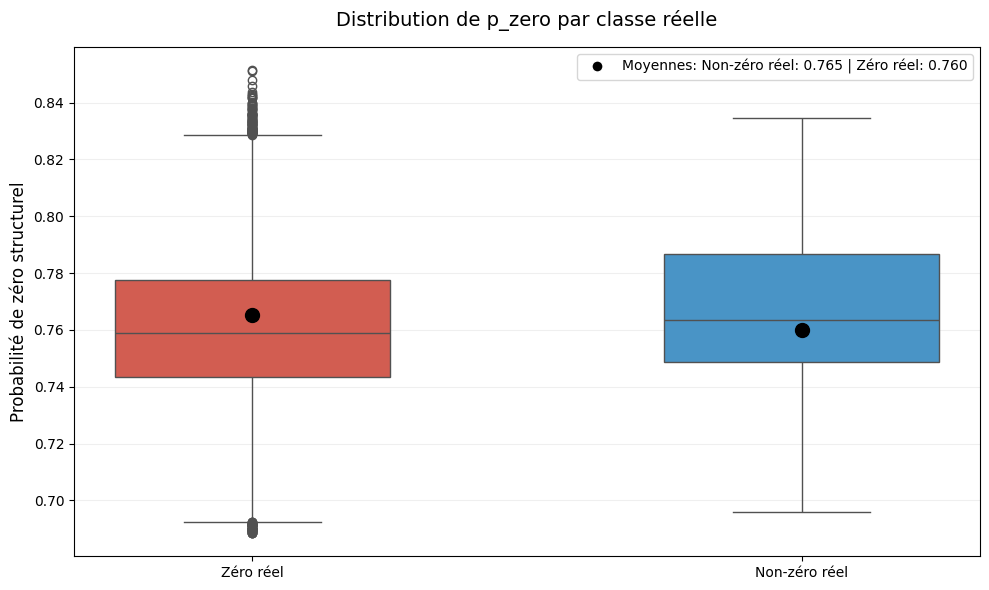


Analyse statistique de p_zero par classe:
                 count    mean     std     min     25%     50%     75%     max
Classe réelle                                                                 
Non-zéro réel     84.0  0.7654  0.0296  0.6960  0.7488  0.7635  0.7867  0.8347
Zéro réel      13255.0  0.7599  0.0278  0.6885  0.7435  0.7588  0.7775  0.8515

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.00      0.00      0.00        84
        Zéro       0.99      1.00      1.00     13255

    accuracy                           0.99     13339
   macro avg       0.50      0.50      0.50     13339
weighted avg       0.99      0.99      0.99     13339



/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
with torch.no_grad():
    p_zero_test, mu_test, r_test = trained_model(X_test_tensor)
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Create DataFrame for visualization
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                palette=["#e74c3c", "#3498db"], width=0.5)

# Calculate means
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()

# Create custom legend entries
legend_entries = []
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100)
    legend_entries.append(f'{cls}: {mean:.3f}')

# Create unified legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='black', markersize=8,
                              label='Moyennes: ' + ' | '.join(legend_entries))],
           loc='upper right')

plt.title("Distribution de p_zero par classe réelle", fontsize=14, pad=15)
plt.ylabel("Probabilité de zéro structurel", fontsize=12)
plt.xlabel("")
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


# 3. Statistical summary
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 4. Classification report
from sklearn.metrics import classification_report
y_pred_zero = (p_zero_test_np > 0.5).astype(int)
y_true_zero = (y_test_np == 0).astype(int)

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                           target_names=["Non-zéro", "Zéro"]))

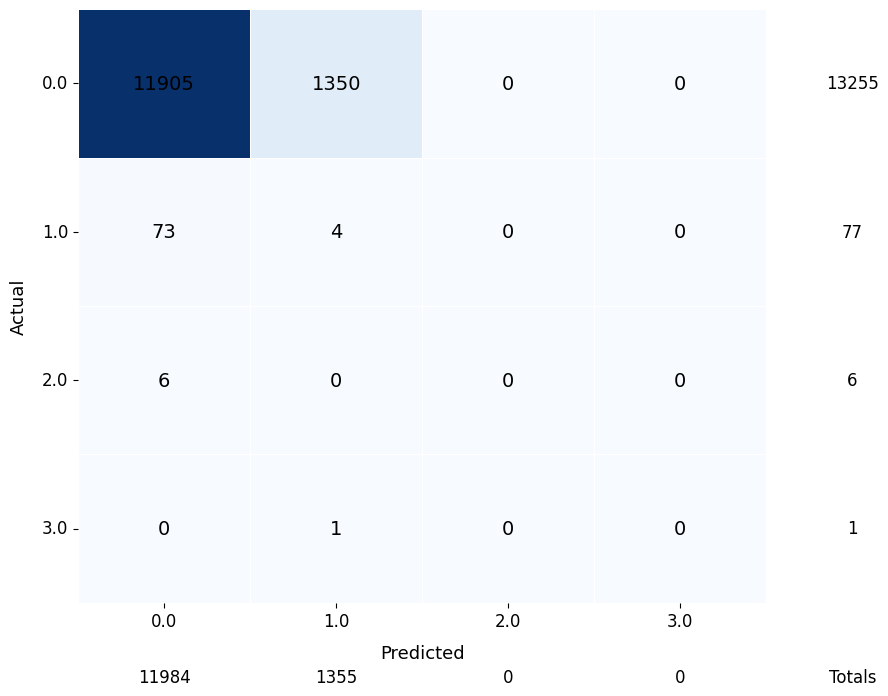


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.99      0.90      0.94     13255
   Class 1.0       0.00      0.05      0.01        77
   Class 2.0       0.00      0.00      0.00         6
   Class 3.0       0.00      0.00      0.00         1

    accuracy                           0.89     13339
   macro avg       0.25      0.24      0.24     13339
weighted avg       0.99      0.89      0.94     13339


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 13255      | 11984      | 11905     
1.0        | 77         | 1355       | 4         
2.0        | 6          | 0          | 0         
3.0        | 1          | 0          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clear totals outside the matrix
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

# Add clean total labels
ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")

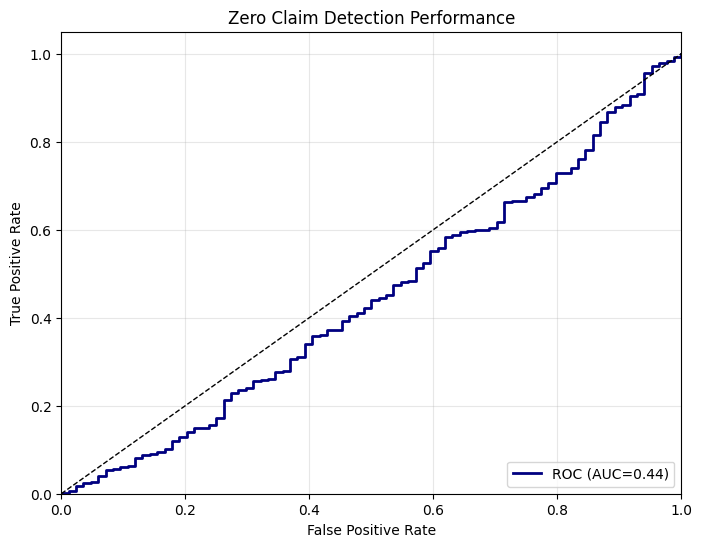

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)


plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

Notre modèle n'est pas du tout performant.

## Application à la variable material_accident

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zinb_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zinb_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="material_accident"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 5]
- Train zero proportion: 85.93%
- Test zero proportion: 85.93%

First 5 training samples:
Features: [0.06 0.13 0.86] -> Target: 0
Features: [0.33 0.44 0.15] -> Target: 0
Features: [-1.4   0.95 -0.09] -> Target: 0
Features: [0.29 0.9  0.74] -> Target: 0
Features: [ 1.31 -2.01 -1.84] -> Target: 0


Epoch    1 | Train Loss: 0.5123 | μ: 0.73 | r: 0.67 | p(zero): 0.53
Epoch   10 | Train Loss: 0.4986 | μ: 0.93 | r: 0.54 | p(zero): 0.51
Epoch   20 | Train Loss: 0.4934 | μ: 1.04 | r: 0.57 | p(zero): 0.42
Epoch   30 | Train Loss: 0.4893 | μ: 1.37 | r: 0.59 | p(zero): 0.29
Epoch   40 | Train Loss: 0.4871 | μ: 1.88 | r: 0.63 | p(zero): 0.18
Epoch   50 | Train Loss: 0.4864 | μ: 2.42 | r: 0.68 | p(zero): 0.11
Epoch   60 | Train Loss: 0.4862 | μ: 2.79 | r: 0.71 | p(zero): 0.08
Epoch   70 | Train Loss: 0.4860 | μ: 2.95 | r: 0.73 | p(zero): 0.07
Epoch   80 | Train Loss: 0.4859 | μ: 2.97 | r: 0.73 | p(zero): 0.07
Epoch   90 | Train Loss: 0.4859 | μ: 2.94 | r: 0.73 | p(zero): 0.07
Epoch  100 | Train Loss: 0.4858 | μ: 2.92 | r: 0.73 | p(zero): 0.07


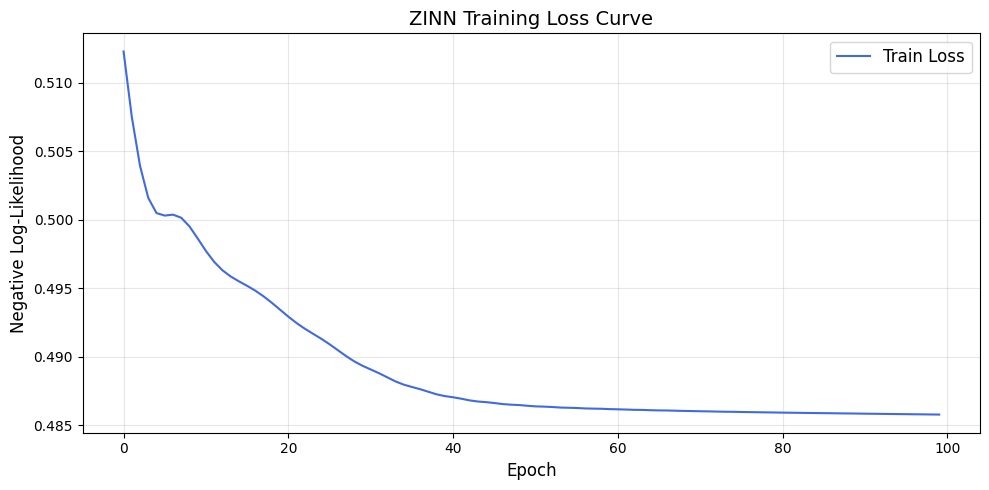


Evaluation Metrics:
- Test Loss: 0.4859
- MAE: 2.5699
- Mean p(zero): 0.0728
- Mean μ: 2.9070
- Mean r: 0.7250

Prediction Examples:
True:  2.0 | Pred:    2
True:  1.0 | Pred:    2
True:  0.0 | Pred:    3
True:  3.0 | Pred:    3
True:  0.0 | Pred:    2

Advanced Prediction Statistics:
- MAE: 2.5699
- RMSE: 2.7515
- True Zero Rate: 85.93%
- Predicted Zero Rate: 0.00%

Prediction Distribution:
  Mean: 2.73
  Std: 0.89
  Min/Max: 1/6
  Percentiles (25/50/75/90/95): [2. 3. 3. 4. 4.]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_evaluate_zinn(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZINN training and evaluation workflow.
    
    Args:
        X_train_tensor: Training features tensor
        y_train_tensor: Training targets tensor
        X_test_tensor: Test features tensor
        y_test_tensor: Test targets tensor
        hidden_dim: Hidden layer size
        epochs: Training epochs
        lr: Learning rate
        verbose: Print progress
        plot: Show training curve
        
    Returns:
        Dictionary containing model, results, and predictions
    """
    # 1. Model initialization
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN(input_dim=input_dim, hidden_dim=hidden_dim)
    
    # 2. Training with early stopping
    trained_model, train_losses = train_zinn(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    # 3. Training visualization
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZINN Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. Comprehensive evaluation
    test_results = evaluate_zinn(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    # 5. Process predictions
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    # 6. Additional metrics
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zinn(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=100,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']

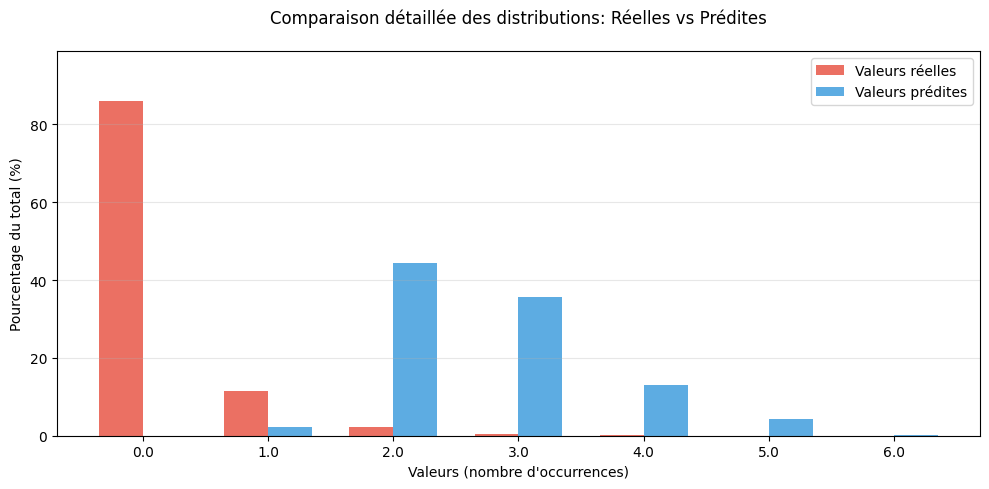


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%) 
--------------------------------------------------
0.0      |      85.93% |       0.00% |     -85.93%
1.0      |      11.40% |       2.37% |      -9.03%
2.0      |       2.26% |      44.30% |     +42.03%
3.0      |       0.32% |      35.68% |     +35.36%
4.0      |       0.07% |      13.04% |     +12.98%
5.0      |       0.01% |       4.32% |      +4.30%
6.0      |       0.00% |       0.28% |      +0.28%


In [ ]:
# 1. First ensure you have these imports at the top of your notebook
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

# 4. Get predictions and convert to numpy
with torch.no_grad():
    p_zero, mu, r = trained_model(X_test_tensor)
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()
    
    # Convert to numpy for visualization
    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 5. Now run the visualization with proper variable names
plt.figure(figsize=(10, 5))

# Get value distributions using the numpy arrays
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.unique(np.concatenate([unique_vals_real, unique_vals_pred]))

# Create relative frequencies (percentages)
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# Plot settings
bar_width = 0.35
x_pos = np.arange(len(all_values))

# Plot distributions
plt.bar(x_pos - bar_width/2, 
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs réelles', 
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2, 
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs prédites', 
        color='#3498db',
        alpha=0.8)

# Add titles and labels
plt.title("Comparaison détaillée des distributions: Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre d'occurrences)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 6. Print the detailed comparison
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10}")
print("-" * 50)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}%")

/tmp/ipykernel_439800/3433444820.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


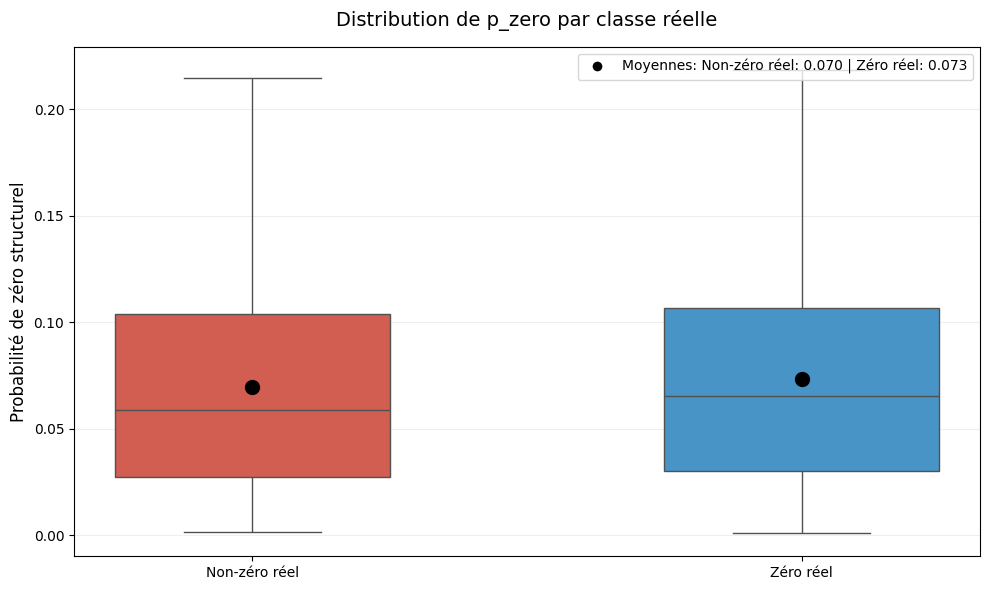


Analyse statistique de p_zero par classe:
                 count    mean     std     min     25%     50%     75%     max
Classe réelle                                                                 
Non-zéro réel   1877.0  0.0697  0.0504  0.0014  0.0271  0.0587  0.1037  0.2145
Zéro réel      11462.0  0.0733  0.0506  0.0009  0.0302  0.0655  0.1068  0.2185

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.14      1.00      0.25      1877
        Zéro       0.00      0.00      0.00     11462

    accuracy                           0.14     13339
   macro avg       0.07      0.50      0.12     13339
weighted avg       0.02      0.14      0.03     13339



/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
with torch.no_grad():
    p_zero_test, mu_test, r_test = trained_model(X_test_tensor)
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Create DataFrame for visualization
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                palette=["#e74c3c", "#3498db"], width=0.5)

# Calculate means
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()

# Create custom legend entries
legend_entries = []
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100)
    legend_entries.append(f'{cls}: {mean:.3f}')

# Create unified legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='black', markersize=8,
                              label='Moyennes: ' + ' | '.join(legend_entries))],
           loc='upper right')

plt.title("Distribution de p_zero par classe réelle", fontsize=14, pad=15)
plt.ylabel("Probabilité de zéro structurel", fontsize=12)
plt.xlabel("")
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


# 3. Statistical summary
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 4. Classification report
from sklearn.metrics import classification_report
y_pred_zero = (p_zero_test_np > 0.5).astype(int)
y_true_zero = (y_test_np == 0).astype(int)

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                           target_names=["Non-zéro", "Zéro"]))

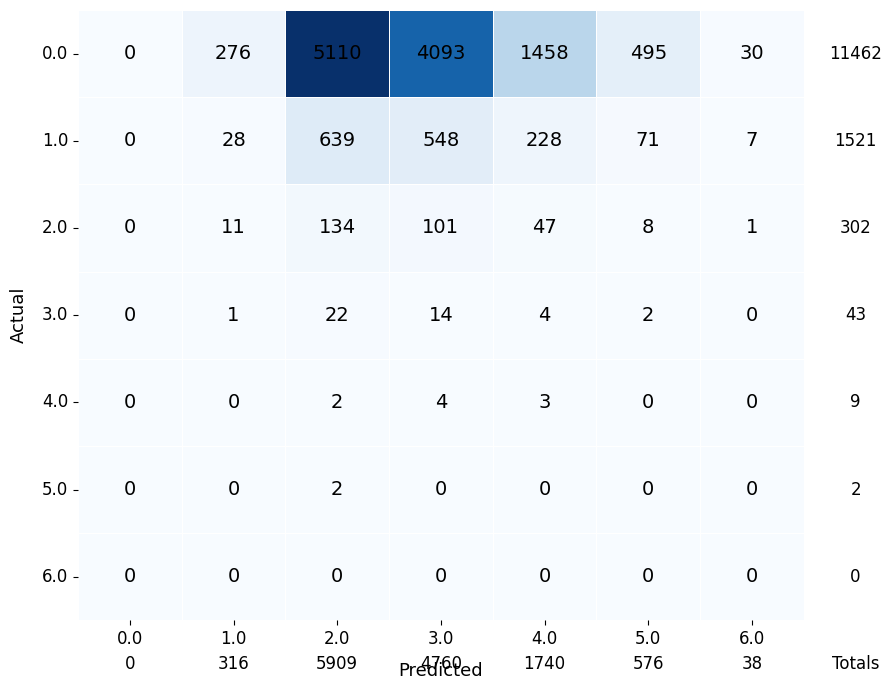


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.00      0.00      0.00     11462
   Class 1.0       0.09      0.02      0.03      1521
   Class 2.0       0.02      0.44      0.04       302
   Class 3.0       0.00      0.33      0.01        43
   Class 4.0       0.00      0.33      0.00         9
   Class 5.0       0.00      0.00      0.00         2
   Class 6.0       0.00      0.00      0.00         0

    accuracy                           0.01     13339
   macro avg       0.02      0.16      0.01     13339
weighted avg       0.01      0.01      0.00     13339


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 11462      | 0          | 0         
1.0        | 1521       | 316        | 28        
2.0        | 302        | 5909       | 134       
3.0        | 43         | 4760       | 14        
4.0        | 9          | 1740       | 3       

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clear totals outside the matrix
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

# Add clean total labels
ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")

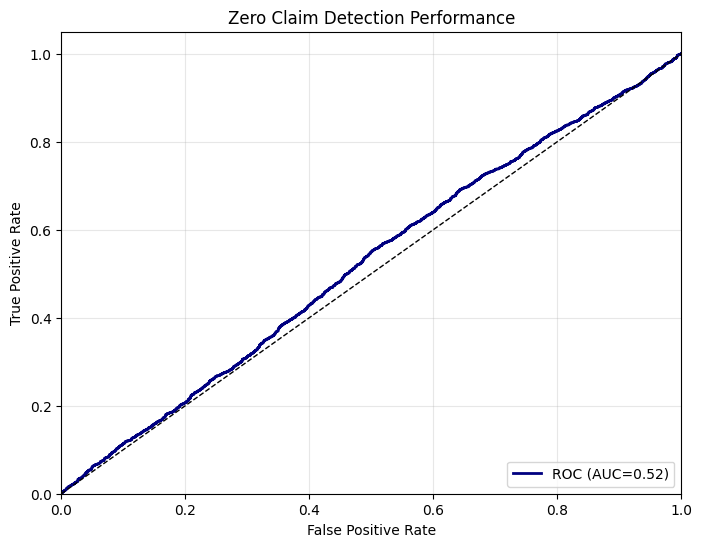

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Construction du ZINN pour theft

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zinb_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zinb_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="theft"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 3]
- Train zero proportion: 99.54%
- Test zero proportion: 99.54%

First 5 training samples:
Features: [-0.57  0.04  0.59] -> Target: 0
Features: [-0.46  1.31  0.86] -> Target: 0
Features: [-1.25  0.51  1.46] -> Target: 0
Features: [-0.93  0.35 -0.41] -> Target: 0
Features: [-1.49  0.41  1.14] -> Target: 0


Epoch    1 | Train Loss: 0.1901 | μ: 0.73 | r: 0.67 | p(zero): 0.53
Epoch   10 | Train Loss: 0.0718 | μ: 1.01 | r: 0.43 | p(zero): 0.63
Epoch   20 | Train Loss: 0.0343 | μ: 1.72 | r: 0.17 | p(zero): 0.81
Epoch   30 | Train Loss: 0.0372 | μ: 2.13 | r: 0.11 | p(zero): 0.87
Epoch   40 | Train Loss: 0.0339 | μ: 1.97 | r: 0.14 | p(zero): 0.84


Epoch   50 | Train Loss: 0.0318 | μ: 1.75 | r: 0.19 | p(zero): 0.79
Epoch   60 | Train Loss: 0.0315 | μ: 1.68 | r: 0.21 | p(zero): 0.77
Epoch   70 | Train Loss: 0.0310 | μ: 1.72 | r: 0.20 | p(zero): 0.78
Epoch   80 | Train Loss: 0.0307 | μ: 1.77 | r: 0.19 | p(zero): 0.79
Epoch   90 | Train Loss: 0.0306 | μ: 1.77 | r: 0.19 | p(zero): 0.78
Epoch  100 | Train Loss: 0.0304 | μ: 1.76 | r: 0.20 | p(zero): 0.78


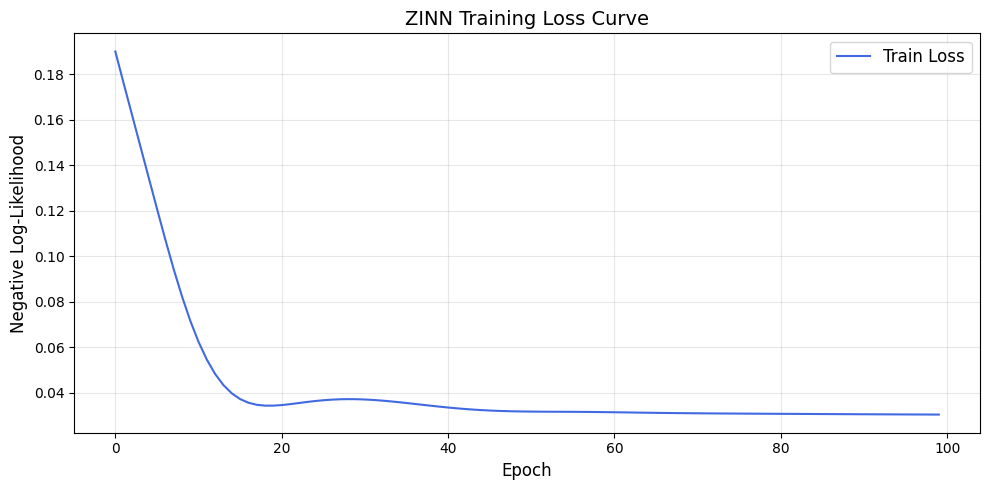


Evaluation Metrics:
- Test Loss: 0.0303
- MAE: 0.1026
- Mean p(zero): 0.7819
- Mean μ: 1.7665
- Mean r: 0.1942

Prediction Examples:
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0

Advanced Prediction Statistics:
- MAE: 0.1026
- RMSE: 0.3212
- True Zero Rate: 99.54%
- Predicted Zero Rate: 90.18%

Prediction Distribution:
  Mean: 0.10
  Std: 0.30
  Min/Max: 0/1
  Percentiles (25/50/75/90/95): [0. 0. 0. 0. 1.]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_evaluate_zinn(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZINN training and evaluation workflow.
    
    Args:
        X_train_tensor: Training features tensor
        y_train_tensor: Training targets tensor
        X_test_tensor: Test features tensor
        y_test_tensor: Test targets tensor
        hidden_dim: Hidden layer size
        epochs: Training epochs
        lr: Learning rate
        verbose: Print progress
        plot: Show training curve
        
    Returns:
        Dictionary containing model, results, and predictions
    """
    # 1. Model initialization
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN(input_dim=input_dim, hidden_dim=hidden_dim)
    
    # 2. Training with early stopping
    trained_model, train_losses = train_zinn(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    # 3. Training visualization
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZINN Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. Comprehensive evaluation
    test_results = evaluate_zinn(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    # 5. Process predictions
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    # 6. Additional metrics
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zinn(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=100,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']

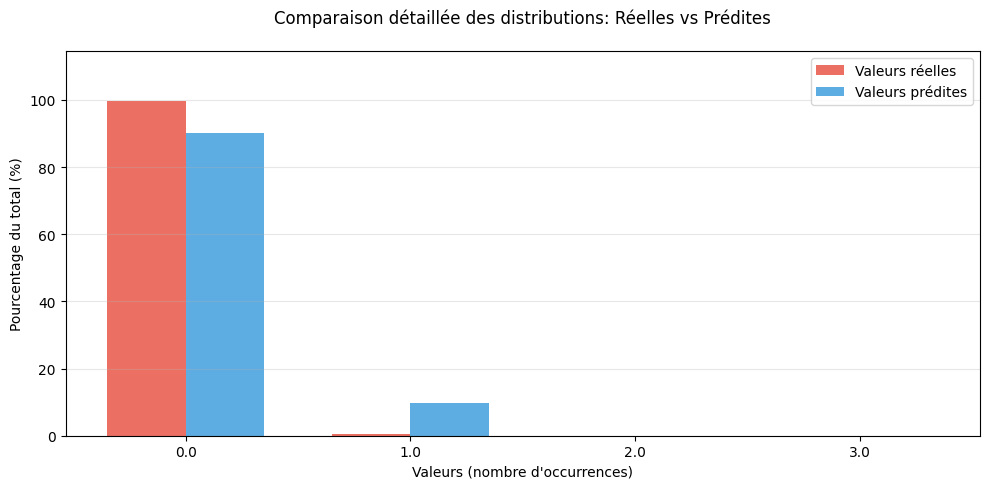


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%) 
--------------------------------------------------
0.0      |      99.54% |      90.18% |      -9.36%
1.0      |       0.44% |       9.82% |      +9.38%
2.0      |       0.01% |       0.00% |      -0.01%
3.0      |       0.01% |       0.00% |      -0.01%


In [ ]:
# 1. First ensure you have these imports at the top of your notebook
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

# 4. Get predictions and convert to numpy
with torch.no_grad():
    p_zero, mu, r = trained_model(X_test_tensor)
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()
    
    # Convert to numpy for visualization
    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 5. Now run the visualization with proper variable names
plt.figure(figsize=(10, 5))

# Get value distributions using the numpy arrays
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.unique(np.concatenate([unique_vals_real, unique_vals_pred]))

# Create relative frequencies (percentages)
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# Plot settings
bar_width = 0.35
x_pos = np.arange(len(all_values))

# Plot distributions
plt.bar(x_pos - bar_width/2, 
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs réelles', 
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2, 
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs prédites', 
        color='#3498db',
        alpha=0.8)

# Add titles and labels
plt.title("Comparaison détaillée des distributions: Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre d'occurrences)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 6. Print the detailed comparison
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10}")
print("-" * 50)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}%")

/tmp/ipykernel_439800/3433444820.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


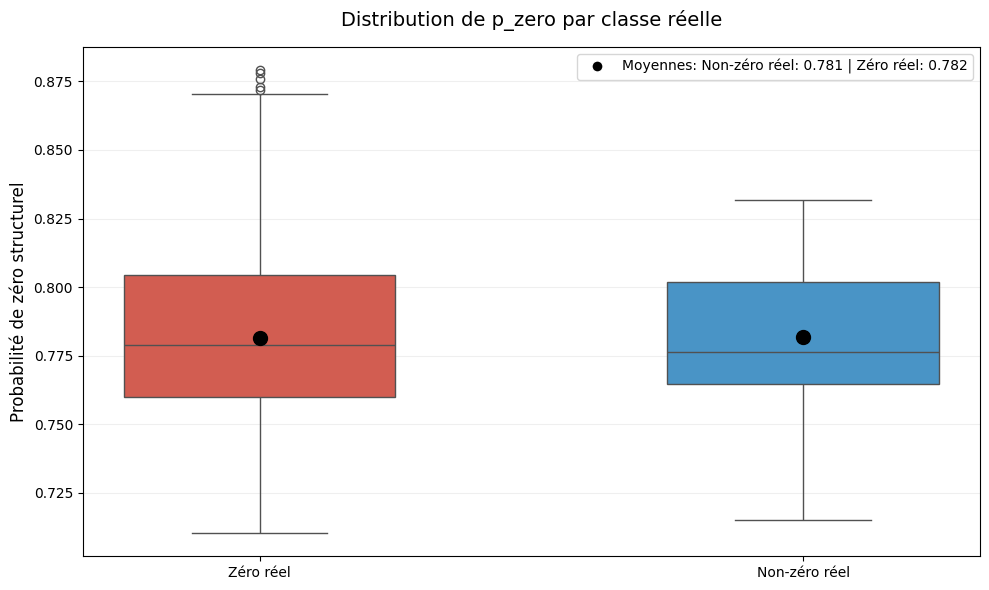


Analyse statistique de p_zero par classe:
                 count    mean     std     min     25%     50%     75%     max
Classe réelle                                                                 
Non-zéro réel     61.0  0.7813  0.0246  0.7151  0.7647  0.7762  0.8020  0.8317
Zéro réel      13278.0  0.7819  0.0305  0.7104  0.7598  0.7791  0.8043  0.8792

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.00      0.00      0.00        61
        Zéro       1.00      1.00      1.00     13278

    accuracy                           1.00     13339
   macro avg       0.50      0.50      0.50     13339
weighted avg       0.99      1.00      0.99     13339



/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
with torch.no_grad():
    p_zero_test, mu_test, r_test = trained_model(X_test_tensor)
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Create DataFrame for visualization
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                palette=["#e74c3c", "#3498db"], width=0.5)

# Calculate means
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()

# Create custom legend entries
legend_entries = []
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100)
    legend_entries.append(f'{cls}: {mean:.3f}')

# Create unified legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='black', markersize=8,
                              label='Moyennes: ' + ' | '.join(legend_entries))],
           loc='upper right')

plt.title("Distribution de p_zero par classe réelle", fontsize=14, pad=15)
plt.ylabel("Probabilité de zéro structurel", fontsize=12)
plt.xlabel("")
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


# 3. Statistical summary
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 4. Classification report
from sklearn.metrics import classification_report
y_pred_zero = (p_zero_test_np > 0.5).astype(int)
y_true_zero = (y_test_np == 0).astype(int)

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                           target_names=["Non-zéro", "Zéro"]))

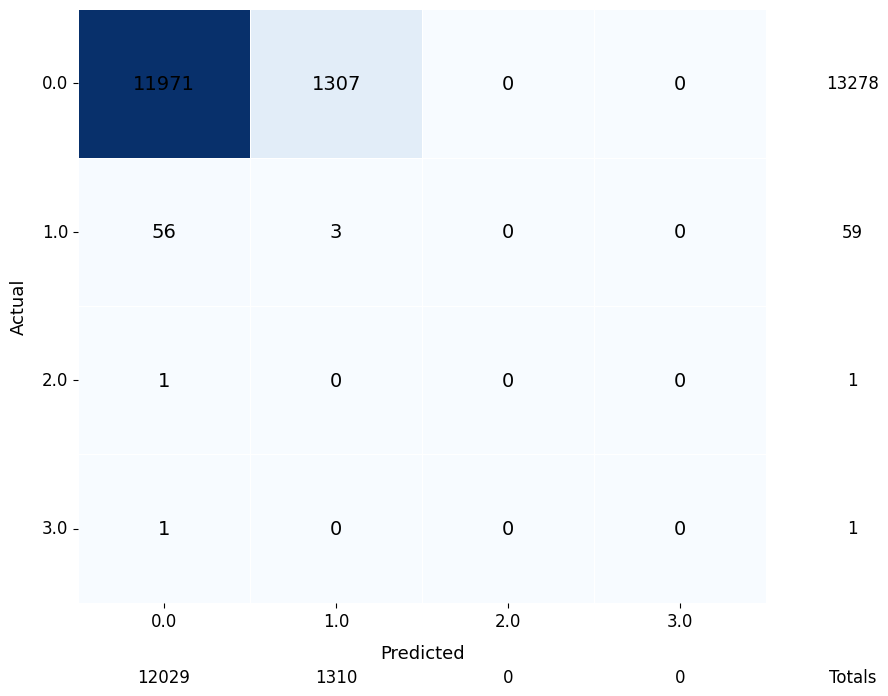


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       1.00      0.90      0.95     13278
   Class 1.0       0.00      0.05      0.00        59
   Class 2.0       0.00      0.00      0.00         1
   Class 3.0       0.00      0.00      0.00         1

    accuracy                           0.90     13339
   macro avg       0.25      0.24      0.24     13339
weighted avg       0.99      0.90      0.94     13339


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 13278      | 12029      | 11971     
1.0        | 59         | 1310       | 3         
2.0        | 1          | 0          | 0         
3.0        | 1          | 0          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clear totals outside the matrix
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

# Add clean total labels
ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")

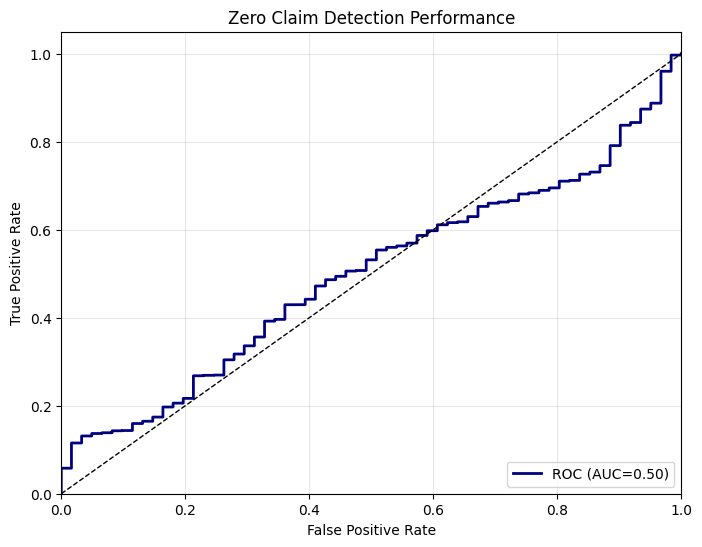

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Application à Broken_glass

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zinb_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zinb_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="broken_glass"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 5]
- Train zero proportion: 93.96%
- Test zero proportion: 93.97%

First 5 training samples:
Features: [-1.2   1.04  0.01] -> Target: 0
Features: [ 0.81 -0.79 -1.45] -> Target: 0
Features: [ 0.91 -0.91 -1.43] -> Target: 0
Features: [-0.03 -0.16  1.17] -> Target: 0
Features: [0.03 0.04 0.89] -> Target: 0


Epoch    1 | Train Loss: 0.3180 | μ: 0.73 | r: 0.67 | p(zero): 0.53
Epoch   10 | Train Loss: 0.2580 | μ: 1.00 | r: 0.43 | p(zero): 0.61
Epoch   20 | Train Loss: 0.2573 | μ: 1.08 | r: 0.41 | p(zero): 0.61
Epoch   30 | Train Loss: 0.2562 | μ: 1.03 | r: 0.46 | p(zero): 0.57
Epoch   40 | Train Loss: 0.2546 | μ: 1.14 | r: 0.42 | p(zero): 0.58


Epoch   50 | Train Loss: 0.2540 | μ: 1.18 | r: 0.42 | p(zero): 0.55
Epoch   60 | Train Loss: 0.2536 | μ: 1.21 | r: 0.43 | p(zero): 0.53
Epoch   70 | Train Loss: 0.2533 | μ: 1.29 | r: 0.42 | p(zero): 0.51
Epoch   80 | Train Loss: 0.2529 | μ: 1.35 | r: 0.42 | p(zero): 0.48
Epoch   90 | Train Loss: 0.2525 | μ: 1.46 | r: 0.42 | p(zero): 0.44
Epoch  100 | Train Loss: 0.2522 | μ: 1.59 | r: 0.42 | p(zero): 0.40


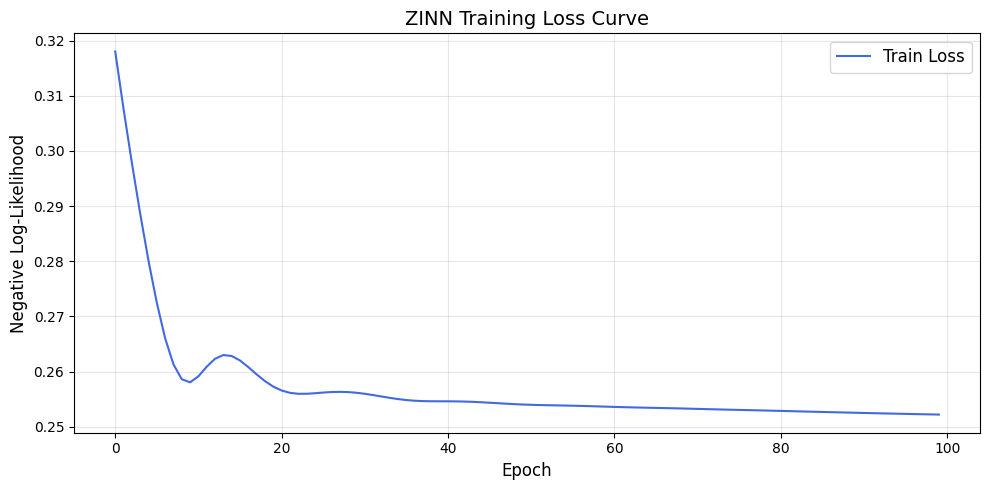


Evaluation Metrics:
- Test Loss: 0.2498
- MAE: 0.9726
- Mean p(zero): 0.3941
- Mean μ: 1.6013
- Mean r: 0.4237

Prediction Examples:
True:  0.0 | Pred:    1
True:  0.0 | Pred:    1
True:  0.0 | Pred:    1
True:  0.0 | Pred:    1
True:  0.0 | Pred:    1

Advanced Prediction Statistics:
- MAE: 0.9726
- RMSE: 1.0114
- True Zero Rate: 93.97%
- Predicted Zero Rate: 0.00%

Prediction Distribution:
  Mean: 1.03
  Std: 0.16
  Min/Max: 1/2
  Percentiles (25/50/75/90/95): [1. 1. 1. 1. 1.]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def train_evaluate_zinn(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZINN training and evaluation workflow.
    
    Args:
        X_train_tensor: Training features tensor
        y_train_tensor: Training targets tensor
        X_test_tensor: Test features tensor
        y_test_tensor: Test targets tensor
        hidden_dim: Hidden layer size
        epochs: Training epochs
        lr: Learning rate
        verbose: Print progress
        plot: Show training curve
        
    Returns:
        Dictionary containing model, results, and predictions
    """
    # 1. Model initialization
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN(input_dim=input_dim, hidden_dim=hidden_dim)
    
    # 2. Training with early stopping
    trained_model, train_losses = train_zinn(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    # 3. Training visualization
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZINN Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. Comprehensive evaluation
    test_results = evaluate_zinn(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    # 5. Process predictions
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    # 6. Additional metrics
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zinn(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=100,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']

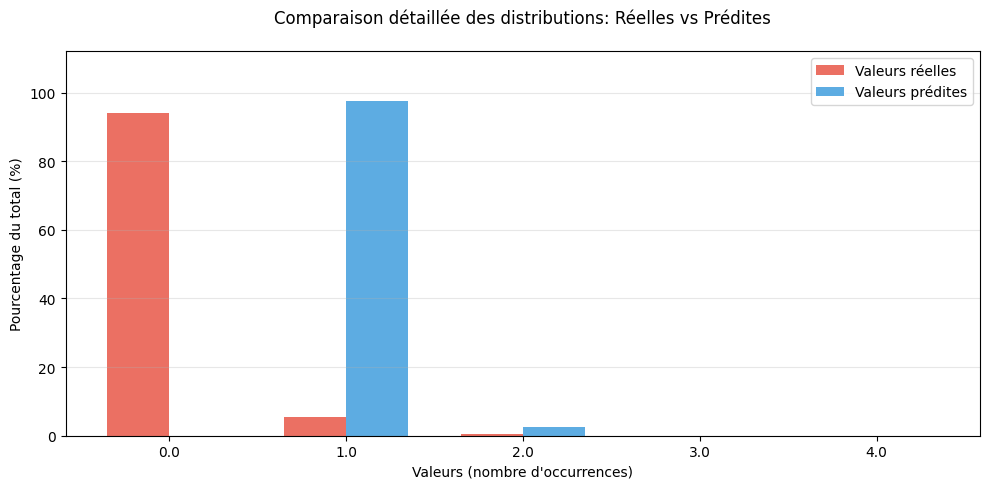


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%) 
--------------------------------------------------
0.0      |      93.97% |       0.00% |     -93.97%
1.0      |       5.38% |      97.42% |     +92.05%
2.0      |       0.59% |       2.58% |      +1.99%
3.0      |       0.06% |       0.00% |      -0.06%
4.0      |       0.01% |       0.00% |      -0.01%


In [ ]:
# 1. First ensure you have these imports at the top of your notebook
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

# 4. Get predictions and convert to numpy
with torch.no_grad():
    p_zero, mu, r = trained_model(X_test_tensor)
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()
    
    # Convert to numpy for visualization
    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 5. Now run the visualization with proper variable names
plt.figure(figsize=(10, 5))

# Get value distributions using the numpy arrays
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.unique(np.concatenate([unique_vals_real, unique_vals_pred]))

# Create relative frequencies (percentages)
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# Plot settings
bar_width = 0.35
x_pos = np.arange(len(all_values))

# Plot distributions
plt.bar(x_pos - bar_width/2, 
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs réelles', 
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2, 
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width, 
        label='Valeurs prédites', 
        color='#3498db',
        alpha=0.8)

# Add titles and labels
plt.title("Comparaison détaillée des distributions: Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre d'occurrences)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 6. Print the detailed comparison
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10}")
print("-" * 50)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}%")

/tmp/ipykernel_439800/2421803895.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


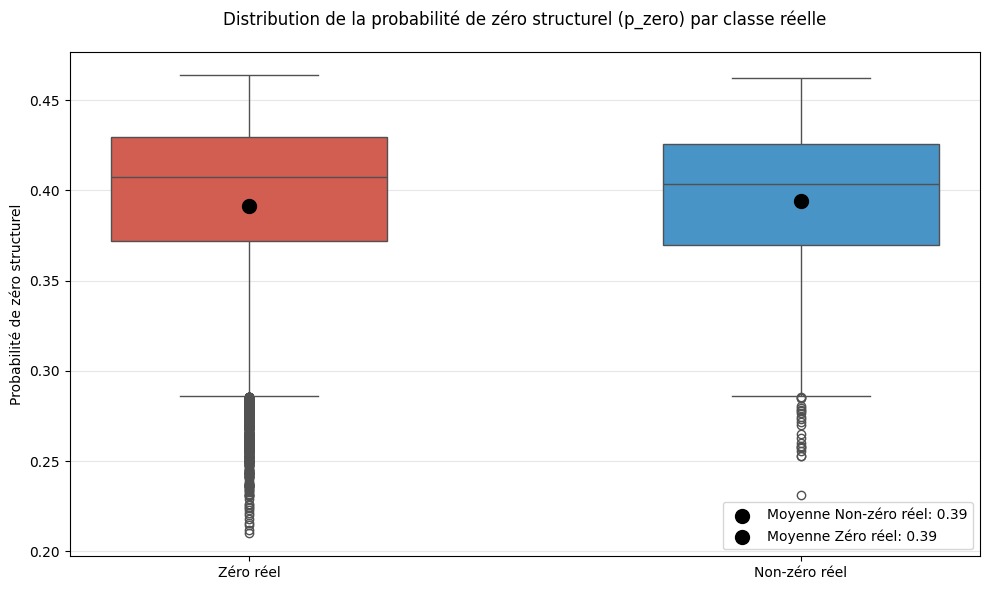


Analyse statistique de p_zero par classe:
                 count    mean     std     min     25%     50%     75%     max
Classe réelle                                                                 
Non-zéro réel    805.0  0.3915  0.0455  0.2313  0.3699  0.4037  0.4259  0.4623
Zéro réel      12534.0  0.3943  0.0472  0.2100  0.3720  0.4072  0.4294  0.4639

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.06      1.00      0.11       805
        Zéro       0.00      0.00      0.00     12534

    accuracy                           0.06     13339
   macro avg       0.03      0.50      0.06     13339
weighted avg       0.00      0.06      0.01     13339



/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
with torch.no_grad():
    p_zero_test, mu_test, r_test = trained_model(X_test_tensor)
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

# Create DataFrame for visualization
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

# 1. Improved Boxplot with both means shown
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                palette=["#e74c3c", "#3498db"], width=0.5)

# Calculate and display both means
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100, label=f'Moyenne {cls}: {mean:.2f}')

plt.title("Distribution de la probabilité de zéro structurel (p_zero) par classe réelle", pad=20)
plt.ylabel("Probabilité de zéro structurel")
plt.xlabel("")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


# 3. Statistical summary
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 4. Classification report
from sklearn.metrics import classification_report
y_pred_zero = (p_zero_test_np > 0.5).astype(int)
y_true_zero = (y_test_np == 0).astype(int)

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                           target_names=["Non-zéro", "Zéro"]))


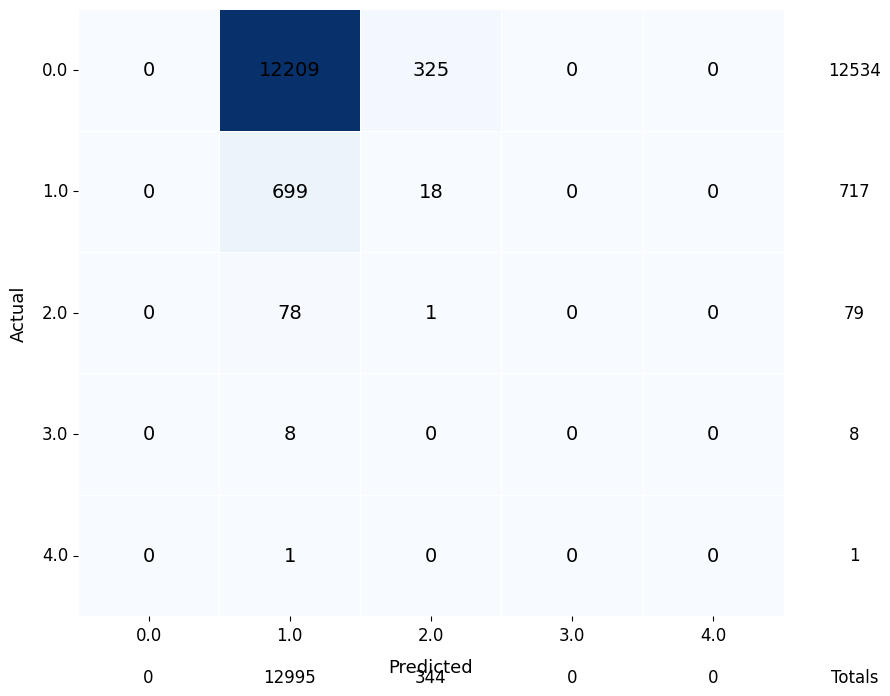


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.00      0.00      0.00     12534
   Class 1.0       0.05      0.97      0.10       717
   Class 2.0       0.00      0.01      0.00        79
   Class 3.0       0.00      0.00      0.00         8
   Class 4.0       0.00      0.00      0.00         1

    accuracy                           0.05     13339
   macro avg       0.01      0.20      0.02     13339
weighted avg       0.00      0.05      0.01     13339


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 12534      | 0          | 0         
1.0        | 717        | 12995      | 699       
2.0        | 79         | 344        | 1         
3.0        | 8          | 0          | 0         
4.0        | 1          | 0          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clear totals outside the matrix
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

# Add clean total labels
ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")

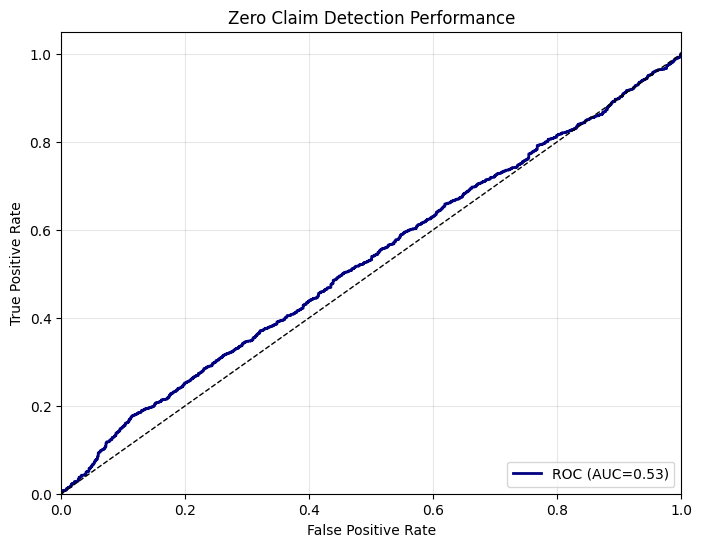

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Construction d'un modèle de Poisson pour fire

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Poisson, Bernoulli

# Fix random seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

class ZeroInflatedNN_Poisson(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(ZeroInflatedNN_Poisson, self).__init__()

        # Shared hidden layers
        self.shared_net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Zero-inflation head (logistic regression)
        self.zero_head = nn.Sequential(
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Outputs p(zero)
        )
        
        # Count head for Poisson (predicts λ)
        self.count_head = nn.Linear(hidden_dim, 1)  # λ (rate)

    def forward(self, x):
        features = self.shared_net(x)
        
        # Zero-inflation part
        p_zero = self.zero_head(features).squeeze(-1)
        
        # Poisson part
        lambda_ = F.softplus(self.count_head(features).squeeze(-1)) + 1e-4  # ensure positivity
        
        return p_zero, lambda_
    
    def loss(self, p_zero, lambda_, target):
        # Poisson PMF: P(y) = exp(-λ) * λ^y / y!
        pois_dist = Poisson(rate=lambda_)
        pois_pmf = torch.exp(pois_dist.log_prob(target))
        
        # Zero-Inflation: π·I(y=0) + (1-π)·Poisson(y)
        likelihood = torch.where(
            target == 0,
            p_zero + (1 - p_zero) * pois_pmf,
            (1 - p_zero) * pois_pmf
        )
        
        return -torch.log(likelihood + 1e-8).mean()  # Negative log-likelihood

    def predict(self, x, sample=False):
        """
        Generate predictions from the ZIP model.

        Args:
            x: Input features
            sample: If True, sample from ZIP distribution.
                    If False, return expected value E[Y] = (1-π)*λ.
        """
        self.eval()
        with torch.no_grad():
            p_zero, lambda_ = self(x)
            
            if sample:
                # Sample from Bernoulli (zero-inflation)
                is_zero = torch.rand_like(p_zero) < p_zero
                
                # Sample from Poisson (counts)
                pois_dist = Poisson(rate=lambda_)
                counts = pois_dist.sample()
                
                # Apply zero-inflation: structural zeros replace Poisson samples
                predictions = torch.where(is_zero, 
                                          torch.zeros_like(counts), 
                                          counts)
            else:
                # Expected value of ZIP: E[Y] = (1-π)*λ
                predictions = (1 - p_zero) * lambda_
                
            return predictions.long()


In [ ]:
def train_zip(model, X_train, y_train, X_val=None, y_val=None, epochs=100, lr=0.01, 
              verbose=True, early_stopping=False, patience=20, seed=42):
    """Train a Zero-Inflated Poisson Neural Network."""
    set_seed(seed)
    device = next(model.parameters()).device
    
    # Convert data to device
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    if X_val is not None:
        X_val = X_val.to(device)
        y_val = y_val.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience//2)
    
    train_losses = []
    val_losses = []
    best_loss = float('inf')
    no_improve = 0
    best_state = None

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        
        p_zero, lambda_ = model(X_train)
        loss = model.loss(p_zero, lambda_, y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        train_losses.append(loss.item())

        # Validation
        if X_val is not None:
            model.eval()
            with torch.no_grad():
                p_zero_val, lambda_val = model(X_val)
                val_loss = model.loss(p_zero_val, lambda_val, y_val)
                val_losses.append(val_loss.item())
                scheduler.step(val_loss)
                
            if early_stopping:
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_state = copy.deepcopy(model.state_dict())
                    no_improve = 0
                else:
                    no_improve += 1

        if verbose and (epoch % 10 == 0 or epoch == 1 or epoch == epochs):
            log_msg = (f"Epoch {epoch:4d} | Train Loss: {loss.item():.4f} | "
                      f"λ: {lambda_.mean().item():.2f} | "
                      f"p(zero): {p_zero.mean().item():.2f}")
            if X_val is not None:
                log_msg += f" | Val Loss: {val_loss.item():.4f}"
            print(log_msg)

        if early_stopping and no_improve >= patience:
            if verbose:
                print(f"\nEarly stopping triggered at epoch {epoch}")
            model.load_state_dict(best_state)
            break

    return model, train_losses


In [ ]:
def evaluate_zip(model, X_test, y_test, verbose=True):
    """Evaluate a trained Zero-Inflated Poisson model."""
    device = next(model.parameters()).device
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    
    model.eval()
    with torch.no_grad():
        p_zero, lambda_ = model(X_test)
        y_pred_mean = (1 - p_zero) * lambda_
        y_pred_int = torch.round(y_pred_mean).long()
        
        test_loss = model.loss(p_zero, lambda_, y_test)
        mae = torch.mean(torch.abs(y_pred_int.float() - y_test))
        
        results = {
            'loss': test_loss.item(),
            'mae': mae.item(),
            'mean_p_zero': p_zero.mean().item(),
            'mean_lambda': lambda_.mean().item(),
            'predictions': y_pred_int.cpu().numpy()
        }
        
        if verbose:
            print("\nEvaluation Metrics:")
            print(f"- Test Loss: {results['loss']:.4f}")
            print(f"- MAE: {results['mae']:.4f}")
            print(f"- Mean p(zero): {results['mean_p_zero']:.4f}")
            print(f"- Mean λ: {results['mean_lambda']:.4f}")
            
            print("\nPrediction Examples:")
            for i in range(min(5, len(y_test))):
                print(f"True: {y_test[i].item():4.1f} | Pred: {y_pred_int[i].item():4d}")
        
        return results


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zip_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zip_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="fire"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 2]
- Train zero proportion: 99.79%
- Test zero proportion: 99.79%

First 5 training samples:
Features: [-1.11  0.99  1.32] -> Target: 0
Features: [0.61 1.82 0.06] -> Target: 0
Features: [-0.64  0.25  0.81] -> Target: 0
Features: [-0.14  1.01 -0.58] -> Target: 0
Features: [ 0.51 -1.61 -1.14] -> Target: 0


Epoch    1 | Train Loss: 0.2911 | λ: 0.76 | p(zero): 0.53
Epoch   10 | Train Loss: 0.1466 | λ: 0.54 | p(zero): 0.68
Epoch   20 | Train Loss: 0.0329 | λ: 0.20 | p(zero): 0.89
Epoch   30 | Train Loss: 0.0186 | λ: 0.06 | p(zero): 0.97
Epoch   40 | Train Loss: 0.0197 | λ: 0.03 | p(zero): 0.98
Epoch   50 | Train Loss: 0.0194 | λ: 0.03 | p(zero): 0.98
Epoch   60 | Train Loss: 0.0183 | λ: 0.04 | p(zero): 0.98
Epoch   70 | Train Loss: 0.0174 | λ: 0.05 | p(zero): 0.98
Epoch   80 | Train Loss: 0.0170 | λ: 0.07 | p(zero): 0.97
Epoch   90 | Train Loss: 0.0168 | λ: 0.07 | p(zero): 0.97
Epoch  100 | Train Loss: 0.0166 | λ: 0.07 | p(zero): 0.97


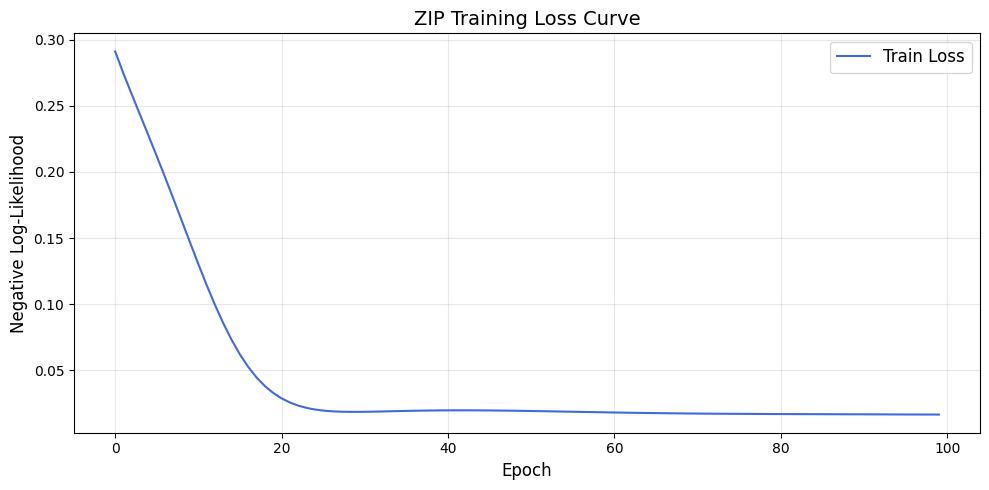


Evaluation Metrics:
- Test Loss: 0.0162
- MAE: 0.0021
- Mean p(zero): 0.9689
- Mean λ: 0.0700

Prediction Examples:
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0

Advanced Prediction Statistics:
- MAE: 0.0021
- RMSE: 0.0458
- True Zero Rate: 99.79%
- Predicted Zero Rate: 100.00%

Prediction Distribution:
  Mean: 0.00
  Std: 0.00
  Min/Max: 0/0
  Percentiles (25/50/75/90/95): [0. 0. 0. 0. 0.]


In [ ]:
def train_evaluate_zip(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZIP training and evaluation workflow.
    """
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN_Poisson(input_dim=input_dim, hidden_dim=hidden_dim)
    
    trained_model, train_losses = train_zip(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZIP Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    test_results = evaluate_zip(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zip(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=100,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']


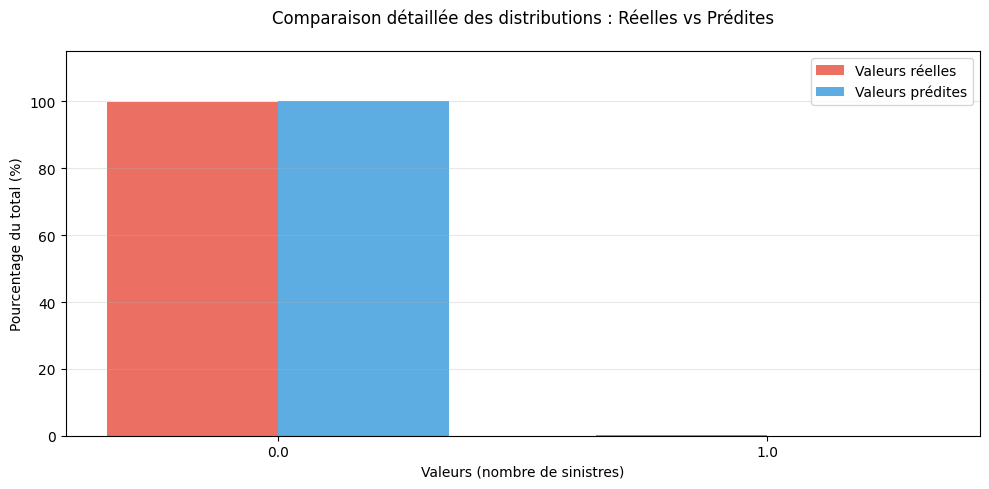


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%)  | Remarque
-----------------------------------------------------------------
0.0      |      99.79% |     100.00% |      +0.21% | 
1.0      |       0.21% |       0.00% |      -0.21% | ⚠️ absente dans les prédictions

Analyse des zéros :
- Taux de zéros (réels)   : 99.79%
- Taux de zéros (prédits) : 100.00%
- Écart                    : +0.21%


In [ ]:
# 1. Prédictions du modèle (en supposant que le modèle retourne 2 valeurs : p_zero et mu)
with torch.no_grad():
    p_zero, mu = trained_model(X_test_tensor)  # Il n'y a que 2 valeurs ici
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()

    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 2. Analyse des distributions
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.sort(np.unique(np.concatenate([unique_vals_real, unique_vals_pred])))

# 3. Fréquences relatives
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# 4. Plot comparatif
plt.figure(figsize=(10, 5))
bar_width = 0.35
x_pos = np.arange(len(all_values))

plt.bar(x_pos - bar_width/2,
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width,
        label='Valeurs réelles',
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2,
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width,
        label='Valeurs prédites',
        color='#3498db',
        alpha=0.8)

plt.title("Comparaison détaillée des distributions : Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre de sinistres)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 5. Comparaison textuelle détaillée
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10} | Remarque")
print("-" * 65)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    note = ""
    if val not in unique_vals_real:
        note = "⚠️ absente dans les vraies"
    elif val not in unique_vals_pred:
        note = "⚠️ absente dans les prédictions"
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}% | {note}")

# 6. Résumé sur les zéros
zero_real = (y_test_np == 0).mean() * 100
zero_pred = (y_pred_np == 0).mean() * 100
print("\nAnalyse des zéros :")
print(f"- Taux de zéros (réels)   : {zero_real:.2f}%")
print(f"- Taux de zéros (prédits) : {zero_pred:.2f}%")
print(f"- Écart                    : {zero_pred - zero_real:+.2f}%")


/tmp/ipykernel_439800/3057211847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


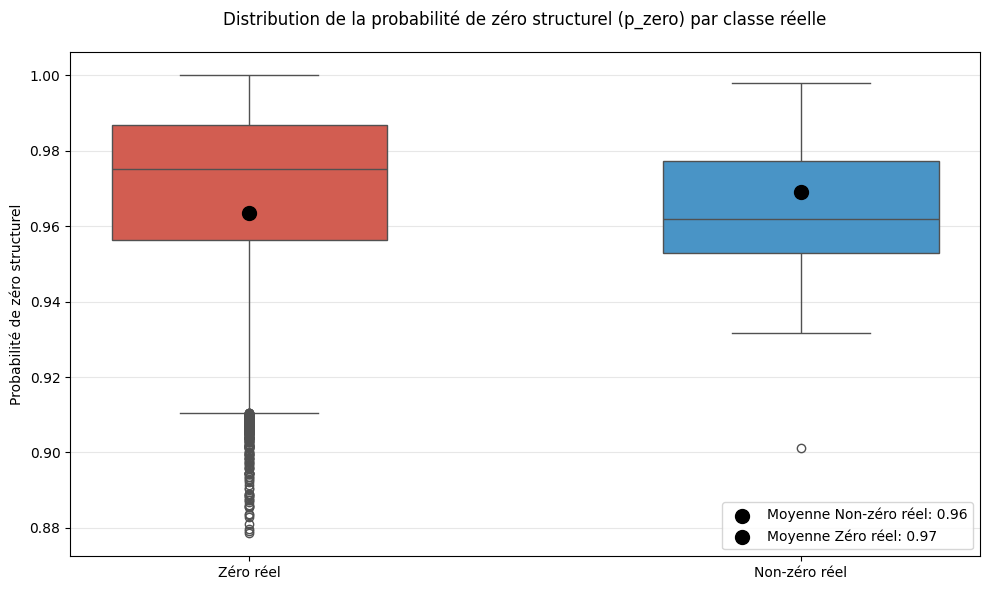


Analyse statistique de p_zero par classe:
                 count    mean     std     min     25%     50%     75%     max
Classe réelle                                                                 
Non-zéro réel     28.0  0.9635  0.0207  0.9013  0.9528  0.9618  0.9773  0.9978
Zéro réel      13311.0  0.9689  0.0227  0.8786  0.9563  0.9750  0.9868  1.0000

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.00      0.00      0.00        28
        Zéro       1.00      1.00      1.00     13311

    accuracy                           1.00     13339
   macro avg       0.50      0.50      0.50     13339
weighted avg       1.00      1.00      1.00     13339



/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# 1. Prédictions du modèle
with torch.no_grad():
    # Ajustement en fonction de ce que ton modèle retourne
    p_zero_test, mu_test = trained_model(X_test_tensor)  # Si le modèle ne retourne que 2 valeurs
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()  # Conversion en numpy array
    y_test_np = y_test_tensor.cpu().numpy()

# 2. Création du DataFrame pour la visualisation
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

# 3. Boxplot amélioré avec les moyennes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                 palette=["#e74c3c", "#3498db"], width=0.5)

# Calcul des moyennes et ajout des points moyens
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100, label=f'Moyenne {cls}: {mean:.2f}')

plt.title("Distribution de la probabilité de zéro structurel (p_zero) par classe réelle", pad=20)
plt.ylabel("Probabilité de zéro structurel")
plt.xlabel("")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Analyse statistique de p_zero
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 5. Rapport de classification basé sur un seuil de 0.5
y_pred_zero = (p_zero_test_np > 0.5).astype(int)  # Seuil de 0.5 pour prédire les zéros
y_true_zero = (y_test_np == 0).astype(int)  # Conversion des vraies classes de sinistre en 0 et 1

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                            target_names=["Non-zéro", "Zéro"]))


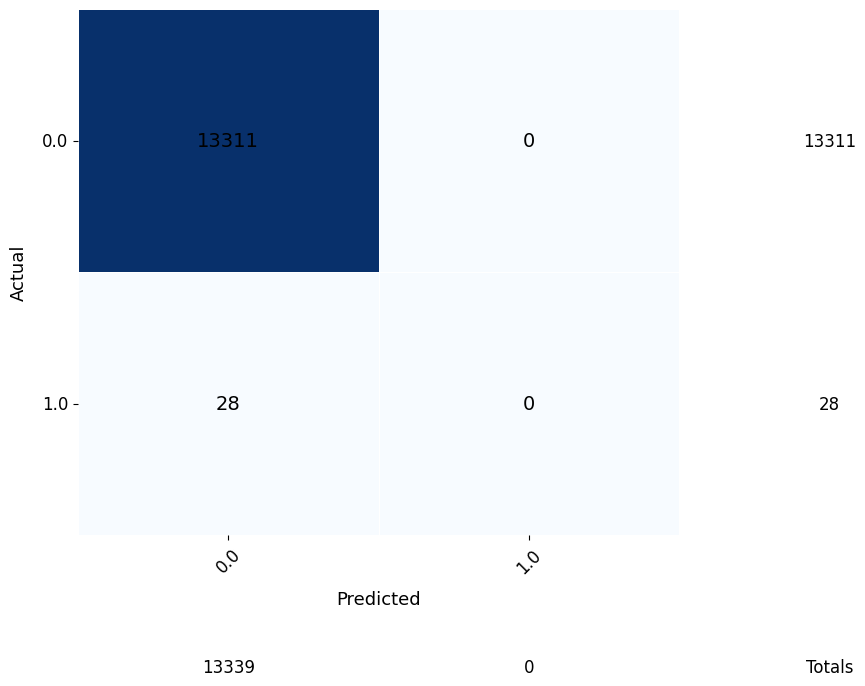


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       1.00      1.00      1.00     13311
   Class 1.0       0.00      0.00      0.00        28

    accuracy                           1.00     13339
   macro avg       0.50      0.50      0.50     13339
weighted avg       1.00      1.00      1.00     13339


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 13311      | 13339      | 13311     
1.0        | 28         | 0          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12, rotation=45)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clean total labels
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")


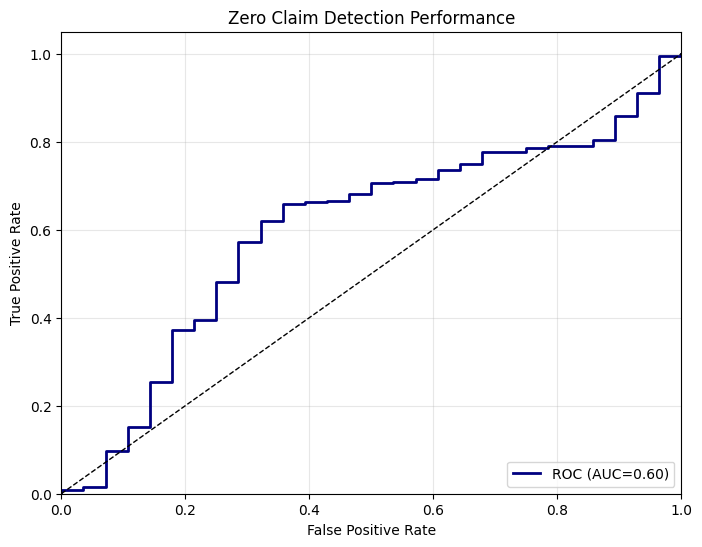

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

def prepare_zip_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors and scaler
    """
    # 1. Feature/target selection with validation
    X = df[features].values
    y = df[target].values

    # Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")
    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("Features and target must be convertible to numpy arrays")

    # 2. Preprocessing with standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 3. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 4. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': scaler
    }

    # 5. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zip_data(
    df=AssuAE,
    features=["facteur1", "facteur2", "facteur3"],
    target="fire"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']


Data Preparation Summary:
- Training samples: 53354
- Test samples: 13339
- Feature dimension: 3
- Target range: [0, 2]
- Train zero proportion: 99.79%
- Test zero proportion: 99.79%

First 5 training samples:
Features: [-1.11  0.99  1.32] -> Target: 0
Features: [0.61 1.82 0.06] -> Target: 0
Features: [-0.64  0.25  0.81] -> Target: 0
Features: [-0.14  1.01 -0.58] -> Target: 0
Features: [ 0.51 -1.61 -1.14] -> Target: 0


## Construction du ZINN pour la base 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def prepare_zip_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors, scaler, and column names
    """
    # 1. Feature/target selection with validation
    X = df[features].copy()  # Ensure we don't modify the original dataframe
    y = df[target].values  # Convert target column to numpy array

    # Check types: X must be a pandas DataFrame and y must be a numpy array
    if not isinstance(X, pd.DataFrame):
        raise TypeError(f"Features must be a pandas DataFrame, got {type(X)}")
    if not isinstance(y, np.ndarray):
        raise TypeError(f"Target must be a numpy array, got {type(y)}")

    # 2. Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")

    # 3. Identify categorical features (object and bool types)
    categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
    
    # 4. Identify numerical features (int and float types)
    numerical_features = X.select_dtypes(include=['int', 'float']).columns.tolist()

    # 5. Preprocessing pipeline for categorical variables with one-hot encoding
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # OneHotEncoding
    ])

    # 6. Preprocessing pipeline for numerical variables with standardization
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
        ('scaler', StandardScaler())  # Standardization
    ])
    
    # 7. ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)  # Standardize numerical features
        ]
    )

    # Apply transformations
    X_transformed = preprocessor.fit_transform(X)
    
    # 8. Get the feature names after one-hot encoding and standardization
    encoded_feature_names = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    standardized_feature_names = numerical_features  # Keep original names for standardized numerical features

    # Combine all feature names
    all_feature_names = np.concatenate([encoded_feature_names, standardized_feature_names])

    # 9. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_transformed, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 10. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': preprocessor,
        'encoded_feature_names': encoded_feature_names,  # Include the encoded feature names
        'all_feature_names': all_feature_names  # Include all feature names (encoded + standardized)
    }

    # 11. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zip_data(
    df=df_forward1,
    features = [
        "months_between_inception", "is_from_aggregator", "PC_earned_exposure", "driver_count", "package", "POL_Fract",
        "POL_Age", "BEH_TypeGarage", "BEH_Usage", "POL_DeclaredAnnualKm", "PER_PurchaseMode",
        "PER_DurDetVehicle", "VEH_Age", "VEH_Antecedent", "is_md_worst_driver", "PER_Age",
        "PER_Profession", "BEH_MaritalStatus", "previous_insurance_months", "POL_Antecedent",
        "PER_LicenceAge", "POL_CRM", "POL_CRMMax", "PER_TimeB50", "is_learner_driver",
        "SRA_DernierPrixConnu", "SRA_Marque", "SRA_CodeEnergie", "SRA_PuissanceReelleMaxiCEE",
        "SRA_Alimentation", "SRA_VitesseMaxi", "SRA_TypeFreins", "SRA_CodeCarrosserie",
        "SRA_Transmission", "SRA_NombrePlaces", "SRA_ClasseReparationActuelle",
        "SRA_ClasseActuelle", "SRA_BoiteVitesses", "SRA_Groupe", "SRA_Classe",
        "SRA_AntiDemarrage", "SRA_Segment", "SRA_NombreRapports", "VEH_ClasseCout",
        "VEH_Segment_FOCUS", "VEH_Carrosserie_FOCUS", "RFVLX1", "RFVLX2", "PDVOL", "AMV2",
        "CVH1", "CVH2", "PROPIL1", "RFBDG", "all_missings"
    ],
    target = "totalClaimCount"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']
encoded_feature_names = data_dict['encoded_feature_names']
all_feature_names = data_dict['all_feature_names']

# Print all feature names to check
print("All Feature Names (Encoded + Standardized):")
print(all_feature_names)



Data Preparation Summary:
- Training samples: 2451
- Test samples: 613
- Feature dimension: 299
- Target range: [0, 2]
- Train zero proportion: 88.25%
- Test zero proportion: 88.25%

First 5 training samples:
Features: [ 1.    0.    0.    1.    1.    0.    1.    0.    0.    0.    0.    1.
  0.    1.    0.    0.    1.    0.    0.    1.    0.    1.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.    0.    1.    0.    0.    1.    1.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.

Epoch    1 | Train Loss: 0.4610 | λ: 0.66 | p(zero): 0.53
Epoch   10 | Train Loss: 0.3921 | λ: 0.32 | p(zero): 0.70
Epoch   20 | Train Loss: 0.3575 | λ: 0.27 | p(zero): 0.56
Epoch   30 | Train Loss: 0.3247 | λ: 0.18 | p(zero): 0.53
Epoch   40 | Train Loss: 0.3012 | λ: 0.17 | p(zero): 0.41
Epoch   50 | Train Loss: 0.2766 | λ: 0.14 | p(zero): 0.38
Epoch   60 | Train Loss: 0.2494 | λ: 0.14 | p(zero): 0.40
Epoch   70 | Train Loss: 0.2209 | λ: 0.14 | p(zero): 0.42
Epoch   80 | Train Loss: 0.1982 | λ: 0.16 | p(zero): 0.44
Epoch   90 | Train Loss: 0.1762 | λ: 0.13 | p(zero): 0.53
Epoch  100 | Train Loss: 0.1591 | λ: 0.14 | p(zero): 0.57
Epoch  110 | Train Loss: 0.1478 | λ: 0.12 | p(zero): 0.64
Epoch  120 | Train Loss: 0.1387 | λ: 0.13 | p(zero): 0.66
Epoch  130 | Train Loss: 0.1336 | λ: 0.12 | p(zero): 0.68
Epoch  140 | Train Loss: 0.1296 | λ: 0.13 | p(zero): 0.70
Epoch  150 | Train Loss: 0.1286 | λ: 0.12 | p(zero): 0.72
Epoch  160 | Train Loss: 0.1292 | λ: 0.16 | p(zero): 0.70
Epoch  170 | T

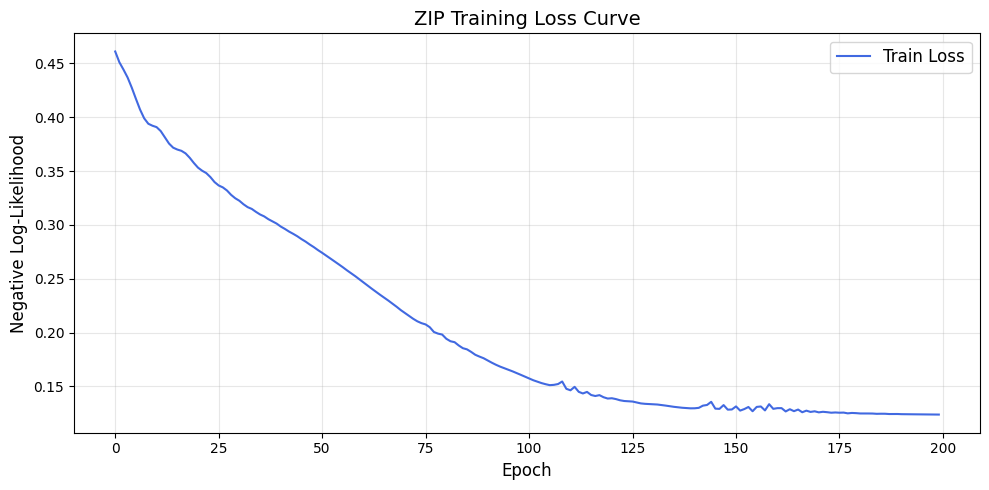


Evaluation Metrics:
- Test Loss: 1.1406
- MAE: 0.2007
- Mean p(zero): 0.7259
- Mean λ: 0.0988

Prediction Examples:
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0

Advanced Prediction Statistics:
- MAE: 0.2007
- RMSE: 0.5494
- True Zero Rate: 88.25%
- Predicted Zero Rate: 94.13%

Prediction Distribution:
  Mean: 0.09
  Std: 0.42
  Min/Max: 0/3
  Percentiles (25/50/75/90/95): [0. 0. 0. 0. 1.]


In [ ]:
def train_evaluate_zip(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZIP training and evaluation workflow.
    """
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN_Poisson(input_dim=input_dim, hidden_dim=hidden_dim)
    
    trained_model, train_losses = train_zip(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZIP Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    test_results = evaluate_zip(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zip(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=200,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']


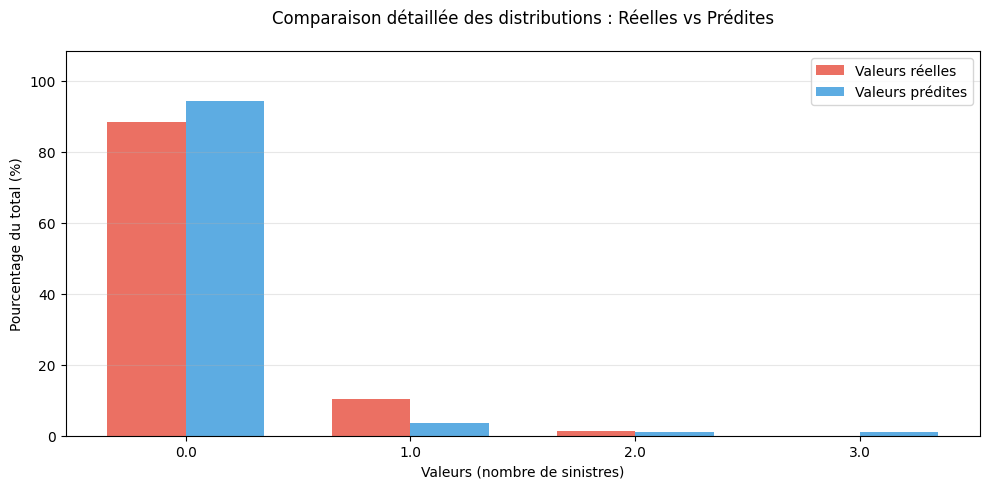


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%)  | Remarque
-----------------------------------------------------------------
0.0      |      88.25% |      94.13% |      +5.87% | 
1.0      |      10.44% |       3.59% |      -6.85% | 
2.0      |       1.31% |       1.14% |      -0.16% | 
3.0      |       0.00% |       1.14% |      +1.14% | ⚠️ absente dans les vraies

Analyse des zéros :
- Taux de zéros (réels)   : 88.25%
- Taux de zéros (prédits) : 94.13%
- Écart                    : +5.87%


In [ ]:
# 1. Prédictions du modèle (en supposant que le modèle retourne 2 valeurs : p_zero et mu)
with torch.no_grad():
    p_zero, mu = trained_model(X_test_tensor)  # Il n'y a que 2 valeurs ici
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()

    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 2. Analyse des distributions
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.sort(np.unique(np.concatenate([unique_vals_real, unique_vals_pred])))

# 3. Fréquences relatives
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# 4. Plot comparatif
plt.figure(figsize=(10, 5))
bar_width = 0.35
x_pos = np.arange(len(all_values))

plt.bar(x_pos - bar_width/2,
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width,
        label='Valeurs réelles',
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2,
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width,
        label='Valeurs prédites',
        color='#3498db',
        alpha=0.8)

plt.title("Comparaison détaillée des distributions : Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre de sinistres)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 5. Comparaison textuelle détaillée
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10} | Remarque")
print("-" * 65)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    note = ""
    if val not in unique_vals_real:
        note = "⚠️ absente dans les vraies"
    elif val not in unique_vals_pred:
        note = "⚠️ absente dans les prédictions"
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}% | {note}")

# 6. Résumé sur les zéros
zero_real = (y_test_np == 0).mean() * 100
zero_pred = (y_pred_np == 0).mean() * 100
print("\nAnalyse des zéros :")
print(f"- Taux de zéros (réels)   : {zero_real:.2f}%")
print(f"- Taux de zéros (prédits) : {zero_pred:.2f}%")
print(f"- Écart                    : {zero_pred - zero_real:+.2f}%")


/tmp/ipykernel_439800/3057211847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


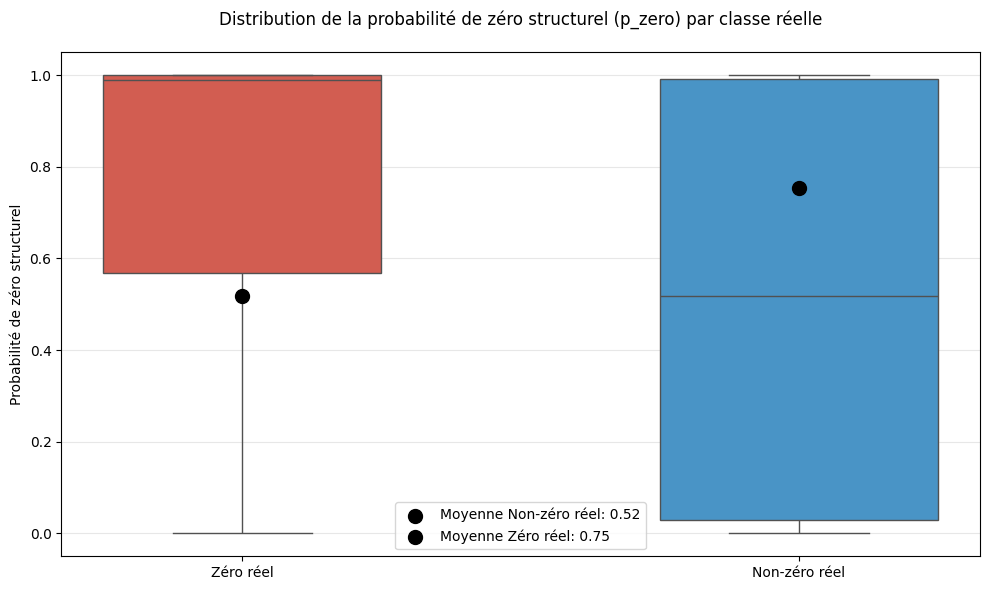


Analyse statistique de p_zero par classe:
               count    mean     std     min     25%     50%     75%  max
Classe réelle                                                            
Non-zéro réel   72.0  0.5179  0.4279  0.0001  0.0284  0.5179  0.9909  1.0
Zéro réel      541.0  0.7536  0.3677  0.0000  0.5681  0.9905  0.9998  1.0

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.20      0.46      0.28        72
        Zéro       0.91      0.76      0.83       541

    accuracy                           0.73       613
   macro avg       0.56      0.61      0.56       613
weighted avg       0.83      0.73      0.77       613



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# 1. Prédictions du modèle
with torch.no_grad():
    # Ajustement en fonction de ce que ton modèle retourne
    p_zero_test, mu_test = trained_model(X_test_tensor)  # Si le modèle ne retourne que 2 valeurs
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()  # Conversion en numpy array
    y_test_np = y_test_tensor.cpu().numpy()

# 2. Création du DataFrame pour la visualisation
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

# 3. Boxplot amélioré avec les moyennes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                 palette=["#e74c3c", "#3498db"], width=0.5)

# Calcul des moyennes et ajout des points moyens
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100, label=f'Moyenne {cls}: {mean:.2f}')

plt.title("Distribution de la probabilité de zéro structurel (p_zero) par classe réelle", pad=20)
plt.ylabel("Probabilité de zéro structurel")
plt.xlabel("")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Analyse statistique de p_zero
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 5. Rapport de classification basé sur un seuil de 0.5
y_pred_zero = (p_zero_test_np > 0.5).astype(int)  # Seuil de 0.5 pour prédire les zéros
y_true_zero = (y_test_np == 0).astype(int)  # Conversion des vraies classes de sinistre en 0 et 1

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                            target_names=["Non-zéro", "Zéro"]))


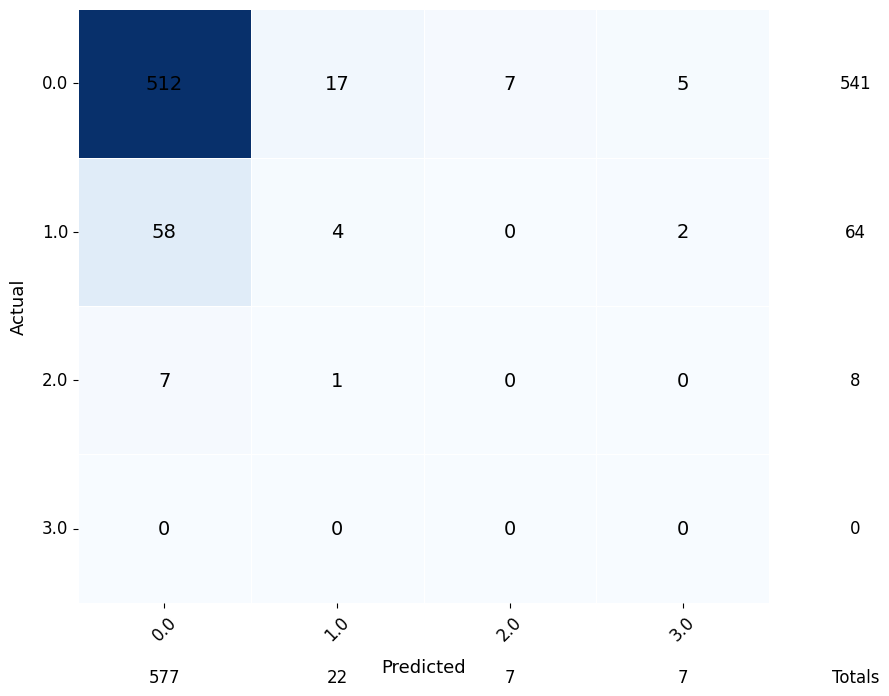


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.89      0.95      0.92       541
   Class 1.0       0.18      0.06      0.09        64
   Class 2.0       0.00      0.00      0.00         8
   Class 3.0       0.00      0.00      0.00         0

    accuracy                           0.84       613
   macro avg       0.27      0.25      0.25       613
weighted avg       0.80      0.84      0.82       613


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 541        | 577        | 512       
1.0        | 64         | 22         | 4         
2.0        | 8          | 7          | 0         
3.0        | 0          | 7          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12, rotation=45)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clean total labels
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")


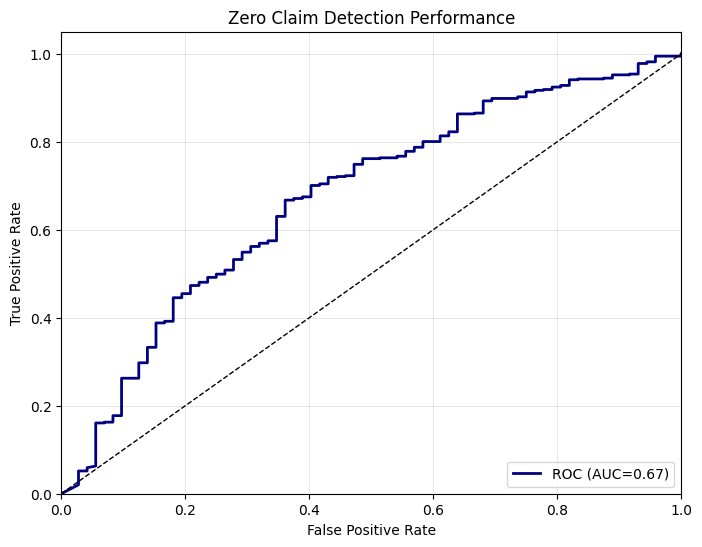

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

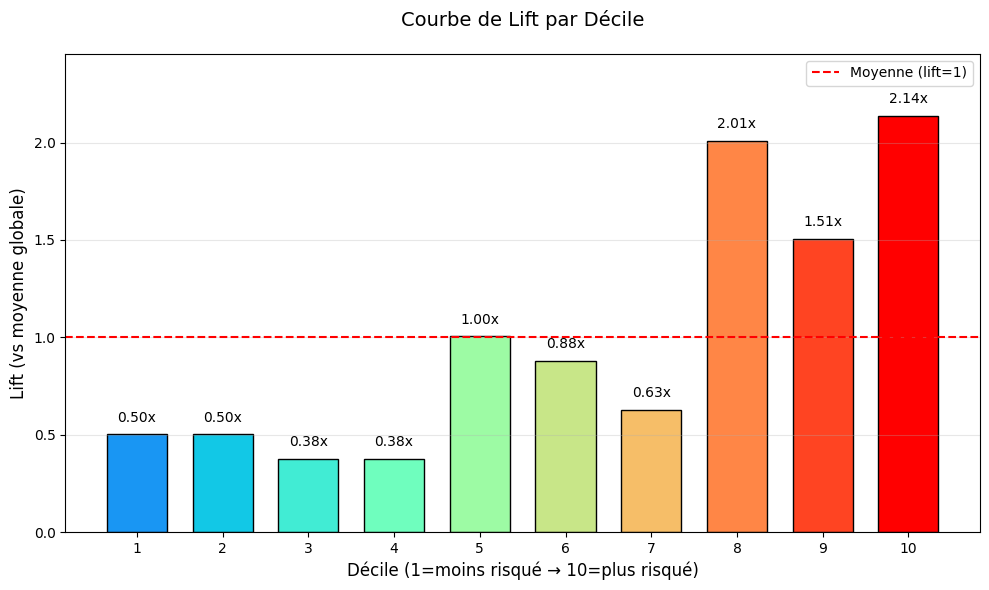

In [ ]:
def calculate_and_plot_lift_vertical(model, X_test, y_test, n_deciles=10):
    """
    Courbe de lift verticale avec déciles 1 (moins bien) à 10 (mieux classés)
    """
    device = next(model.parameters()).device
    X_test = X_test.to(device)
    
    # Prédictions
    model.eval()
    with torch.no_grad():
        p_zero, lambda_ = model(X_test)
        risk_scores = (1 - p_zero) * lambda_
        
    risk_scores = risk_scores.cpu().numpy()
    y_true = y_test.cpu().numpy()
    
    # Tri du MOINS risqué (décile 1) au PLUS risqué (décile 10)
    sorted_indices = np.argsort(risk_scores)  # Ascendant pour 1=moins risqué
    sorted_y_true = y_true[sorted_indices]
    
    # Déciles
    decile_size = len(y_true) // n_deciles
    decile_stats = []
    overall_mean = y_true.mean()
    
    for i in range(n_deciles):
        start = i * decile_size
        end = (i+1) * decile_size
        decile_y_true = sorted_y_true[start:end]
        decile_mean = decile_y_true.mean()
        
        decile_stats.append({
            'decile': i+1,
            'mean_actual': decile_mean,
            'lift': decile_mean / overall_mean
        })
    
    df_lift = pd.DataFrame(decile_stats)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    colors = plt.cm.rainbow(np.linspace(0.2, 1, n_deciles))  # Palette claire
    
    bars = plt.bar(
        df_lift['decile'], 
        df_lift['lift'], 
        color=colors,
        edgecolor='black',
        width=0.7
    )
    
    # Annotations
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.05,
            f'{height:.2f}x',
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    plt.axhline(1, color='red', linestyle='--', label='Moyenne (lift=1)')
    plt.xlabel('Décile (1=moins risqué → 10=plus risqué)', fontsize=12)
    plt.ylabel('Lift (vs moyenne globale)', fontsize=12)
    plt.title('Courbe de Lift par Décile', fontsize=14, pad=20)
    plt.xticks(range(1, n_deciles+1))
    plt.ylim(0, max(df_lift['lift']) * 1.15)
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return df_lift

# Exécution
df_lift = calculate_and_plot_lift_vertical(
    model=results['model'],
    X_test=X_test_tensor,
    y_test=y_test_tensor
)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def prepare_zip_data(df, features, target, test_size=0.2, random_state=42, verbose=True):
    """
    Prepares data for Zero-Inflated Negative Binomial modeling.
    
    Args:
        df: Input DataFrame
        features: List of feature column names
        target: Target column name
        test_size: Size of test split
        random_state: Random seed
        verbose: Whether to print summary stats
        
    Returns:
        Dictionary containing prepared tensors, scaler, and column names
    """
    # 1. Feature/target selection with validation
    X = df[features].copy()  # Ensure we don't modify the original dataframe
    y = df[target].values  # Convert target column to numpy array

    # Check types: X must be a pandas DataFrame and y must be a numpy array
    if not isinstance(X, pd.DataFrame):
        raise TypeError(f"Features must be a pandas DataFrame, got {type(X)}")
    if not isinstance(y, np.ndarray):
        raise TypeError(f"Target must be a numpy array, got {type(y)}")

    # 2. Critical checks for ZINB
    if not (y >= 0).all():
        raise ValueError("Target must contain only non-negative values")
    if len(np.unique(y)) <= 1:
        raise ValueError("Target must have more than one unique value")

    # 3. Identify categorical features (object and bool types)
    categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
    
    # 4. Identify numerical features (int and float types)
    numerical_features = X.select_dtypes(include=['int', 'float']).columns.tolist()

    # 5. Preprocessing pipeline for categorical variables with one-hot encoding
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # OneHotEncoding
    ])

    # 6. Preprocessing pipeline for numerical variables with standardization
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
        ('scaler', StandardScaler())  # Standardization
    ])
    
    # 7. ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)  # Standardize numerical features
        ]
    )

    # Apply transformations
    X_transformed = preprocessor.fit_transform(X)
    
    # 8. Get the feature names after one-hot encoding and standardization
    encoded_feature_names = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    standardized_feature_names = numerical_features  # Keep original names for standardized numerical features

    # Combine all feature names
    all_feature_names = np.concatenate([encoded_feature_names, standardized_feature_names])

    # 9. Train/test split with zero-stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_transformed, 
        y, 
        test_size=test_size,
        random_state=random_state,
        stratify=(y == 0)  # Maintain zero proportion
    )

    # 10. Convert to tensors with type checking
    def _safe_tensor_convert(data, dtype):
        if isinstance(data, torch.Tensor):
            return data.to(dtype=dtype)
        return torch.as_tensor(data, dtype=dtype)
    
    tensors = {
        'X_train': _safe_tensor_convert(X_train, torch.float32),
        'y_train': _safe_tensor_convert(y_train, torch.float32),
        'X_test': _safe_tensor_convert(X_test, torch.float32),
        'y_test': _safe_tensor_convert(y_test, torch.float32),
        'scaler': preprocessor,
        'encoded_feature_names': encoded_feature_names,  # Include the encoded feature names
        'all_feature_names': all_feature_names  # Include all feature names (encoded + standardized)
    }

    # 11. Validation and reporting
    if verbose:
        print("\nData Preparation Summary:")
        print(f"- Training samples: {len(tensors['y_train'])}")
        print(f"- Test samples: {len(tensors['y_test'])}")
        print(f"- Feature dimension: {tensors['X_train'].shape[1]}")
        print(f"- Target range: [{y.min()}, {y.max()}]")
        print(f"- Train zero proportion: {(y_train == 0).mean():.2%}")
        print(f"- Test zero proportion: {(y_test == 0).mean():.2%}")
        print("\nFirst 5 training samples:")
        for i in range(min(5, len(y_train))):
            print(f"Features: {X_train[i].round(2)} -> Target: {y_train[i]}")

    return tensors

# Usage example:
data_dict = prepare_zip_data(
    df=df_forward1,
    features = [
        "months_between_inception", "is_from_aggregator", "PC_earned_exposure", "driver_count", "package", "POL_Fract",
        "POL_Age", "BEH_TypeGarage", "BEH_Usage", "POL_DeclaredAnnualKm", "PER_PurchaseMode",
        "PER_DurDetVehicle", "VEH_Age", "VEH_Antecedent", "is_md_worst_driver", "PER_Age",
        "PER_Profession", "BEH_MaritalStatus", "previous_insurance_months", "POL_Antecedent",
        "PER_LicenceAge", "POL_CRM", "POL_CRMMax", "PER_TimeB50", "is_learner_driver",
        "SRA_DernierPrixConnu", "SRA_Marque", "SRA_CodeEnergie", "SRA_PuissanceReelleMaxiCEE",
        "SRA_Alimentation", "SRA_VitesseMaxi", "SRA_TypeFreins", "SRA_CodeCarrosserie",
        "SRA_Transmission", "SRA_NombrePlaces", "SRA_ClasseReparationActuelle",
        "SRA_ClasseActuelle", "SRA_BoiteVitesses", "SRA_Groupe", "SRA_Classe",
        "SRA_AntiDemarrage", "SRA_Segment", "SRA_NombreRapports", "VEH_ClasseCout",
        "VEH_Segment_FOCUS", "VEH_Carrosserie_FOCUS", "RFVLX1", "RFVLX2", "PDVOL", "AMV2",
        "CVH1", "CVH2", "PROPIL1", "RFBDG", "all_missings","facteur1","facteur2","facteur3"
    ],
    target = "totalClaimCount"
)

# Access prepared data:
X_train_tensor = data_dict['X_train']
y_train_tensor = data_dict['y_train']
X_test_tensor = data_dict['X_test']
y_test_tensor = data_dict['y_test']
scaler = data_dict['scaler']
encoded_feature_names = data_dict['encoded_feature_names']
all_feature_names = data_dict['all_feature_names']

# Print all feature names to check
print("All Feature Names (Encoded + Standardized):")
print(all_feature_names)



Data Preparation Summary:
- Training samples: 2451
- Test samples: 613
- Feature dimension: 302
- Target range: [0, 2]
- Train zero proportion: 88.25%
- Test zero proportion: 88.25%

First 5 training samples:
Features: [ 1.    0.    0.    1.    1.    0.    1.    0.    0.    0.    0.    1.
  0.    1.    0.    0.    1.    0.    0.    1.    0.    1.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  1.    0.    1.    0.    0.    1.    1.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.

Epoch    1 | Train Loss: 0.4756 | λ: 0.65 | p(zero): 0.47
Epoch   10 | Train Loss: 0.3954 | λ: 0.22 | p(zero): 0.67
Epoch   20 | Train Loss: 0.3651 | λ: 0.29 | p(zero): 0.60
Epoch   30 | Train Loss: 0.3410 | λ: 0.25 | p(zero): 0.58
Epoch   40 | Train Loss: 0.3083 | λ: 0.19 | p(zero): 0.48
Epoch   50 | Train Loss: 0.2752 | λ: 0.15 | p(zero): 0.31
Epoch   60 | Train Loss: 0.2376 | λ: 0.14 | p(zero): 0.29
Epoch   70 | Train Loss: 0.2037 | λ: 0.14 | p(zero): 0.32
Epoch   80 | Train Loss: 0.1765 | λ: 0.12 | p(zero): 0.42
Epoch   90 | Train Loss: 0.1564 | λ: 0.14 | p(zero): 0.51
Epoch  100 | Train Loss: 0.1457 | λ: 0.16 | p(zero): 0.57
Epoch  110 | Train Loss: 0.1354 | λ: 0.13 | p(zero): 0.63
Epoch  120 | Train Loss: 0.1314 | λ: 0.15 | p(zero): 0.65
Epoch  130 | Train Loss: 0.1279 | λ: 0.13 | p(zero): 0.69
Epoch  140 | Train Loss: 0.1267 | λ: 0.12 | p(zero): 0.71
Epoch  150 | Train Loss: 0.1269 | λ: 0.15 | p(zero): 0.70
Epoch  160 | Train Loss: 0.1245 | λ: 0.13 | p(zero): 0.72
Epoch  170 | T

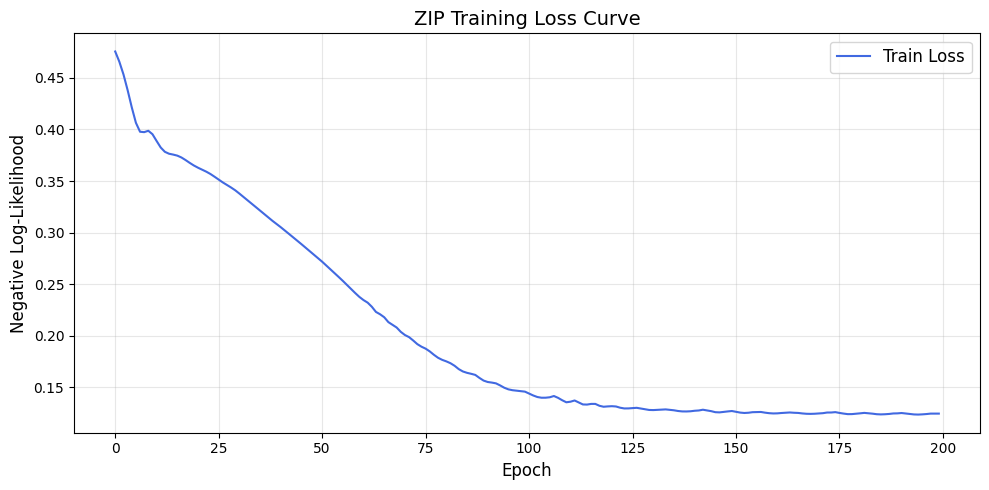


Evaluation Metrics:
- Test Loss: 1.0538
- MAE: 0.1843
- Mean p(zero): 0.7568
- Mean λ: 0.0855

Prediction Examples:
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0
True:  0.0 | Pred:    0

Advanced Prediction Statistics:
- MAE: 0.1843
- RMSE: 0.5523
- True Zero Rate: 88.25%
- Predicted Zero Rate: 96.08%

Prediction Distribution:
  Mean: 0.07
  Std: 0.45
  Min/Max: 0/6
  Percentiles (25/50/75/90/95): [0. 0. 0. 0. 0.]


In [ ]:
def train_evaluate_zip(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                       hidden_dim=32, epochs=100, lr=0.005, verbose=True, plot=True):
    """
    Complete ZIP training and evaluation workflow.
    """
    input_dim = X_train_tensor.shape[1]
    model = ZeroInflatedNN_Poisson(input_dim=input_dim, hidden_dim=hidden_dim)
    
    trained_model, train_losses = train_zip(
        model=model,
        X_train=X_train_tensor,
        y_train=y_train_tensor,
        epochs=epochs,
        lr=lr,
        verbose=verbose,
        early_stopping=True,
        patience=20
    )
    
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Train Loss', color='royalblue')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Negative Log-Likelihood', fontsize=12)
        plt.title('ZIP Training Loss Curve', fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    test_results = evaluate_zip(
        model=trained_model,
        X_test=X_test_tensor,
        y_test=y_test_tensor,
        verbose=verbose
    )
    
    y_pred_int = np.round(test_results['predictions']).astype(int)
    y_true = y_test_tensor.cpu().numpy()
    
    test_results['additional_metrics'] = {
        'mae': mean_absolute_error(y_true, y_pred_int),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred_int)),
        'zero_pred_rate': (y_pred_int == 0).mean(),
        'true_zero_rate': (y_true == 0).mean(),
        'prediction_stats': {
            'mean': y_pred_int.mean(),
            'std': y_pred_int.std(),
            'min': y_pred_int.min(),
            'max': y_pred_int.max(),
            'percentiles': np.percentile(y_pred_int, [25, 50, 75, 90, 95])
        }
    }
    
    if verbose:
        print("\nAdvanced Prediction Statistics:")
        print(f"- MAE: {test_results['additional_metrics']['mae']:.4f}")
        print(f"- RMSE: {test_results['additional_metrics']['rmse']:.4f}")
        print(f"- True Zero Rate: {test_results['additional_metrics']['true_zero_rate']:.2%}")
        print(f"- Predicted Zero Rate: {test_results['additional_metrics']['zero_pred_rate']:.2%}")
        print("\nPrediction Distribution:")
        print(f"  Mean: {test_results['additional_metrics']['prediction_stats']['mean']:.2f}")
        print(f"  Std: {test_results['additional_metrics']['prediction_stats']['std']:.2f}")
        print(f"  Min/Max: {test_results['additional_metrics']['prediction_stats']['min']}/{test_results['additional_metrics']['prediction_stats']['max']}")
        print(f"  Percentiles (25/50/75/90/95): {test_results['additional_metrics']['prediction_stats']['percentiles'].round(2)}")
    
    return {
        'model': trained_model,
        'train_losses': train_losses,
        'test_results': test_results,
        'predictions': y_pred_int
    }

# Usage example:
results = train_evaluate_zip(
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    hidden_dim=32,
    epochs=200,
    lr=0.005
)

# Access results:
trained_model = results['model']
y_pred_int = results['predictions']
test_metrics = results['test_results']['additional_metrics']


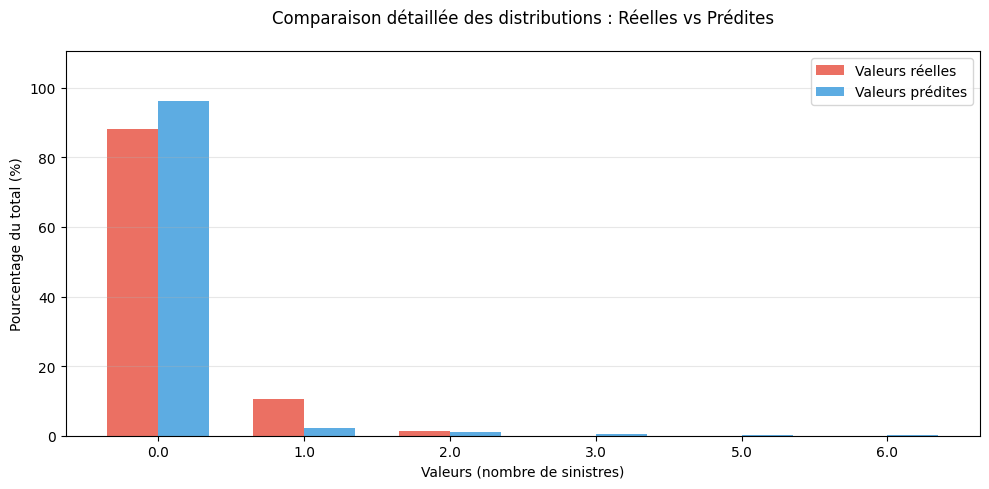


Analyse détaillée des proportions:
Valeur   | Réelles      | Prédites     | Écart (%)  | Remarque
-----------------------------------------------------------------
0.0      |      88.25% |      96.08% |      +7.83% | 
1.0      |      10.44% |       2.12% |      -8.32% | 
2.0      |       1.31% |       0.98% |      -0.33% | 
3.0      |       0.00% |       0.49% |      +0.49% | ⚠️ absente dans les vraies
5.0      |       0.00% |       0.16% |      +0.16% | ⚠️ absente dans les vraies
6.0      |       0.00% |       0.16% |      +0.16% | ⚠️ absente dans les vraies

Analyse des zéros :
- Taux de zéros (réels)   : 88.25%
- Taux de zéros (prédits) : 96.08%
- Écart                    : +7.83%


In [ ]:
# 1. Prédictions du modèle (en supposant que le modèle retourne 2 valeurs : p_zero et mu)
with torch.no_grad():
    p_zero, mu = trained_model(X_test_tensor)  # Il n'y a que 2 valeurs ici
    y_pred_mean = (1 - p_zero) * mu
    y_pred_int = torch.round(y_pred_mean).long()

    y_test_np = y_test_tensor.cpu().numpy()
    y_pred_np = y_pred_int.cpu().numpy()

# 2. Analyse des distributions
unique_vals_real, counts_real = np.unique(y_test_np, return_counts=True)
unique_vals_pred, counts_pred = np.unique(y_pred_np, return_counts=True)
all_values = np.sort(np.unique(np.concatenate([unique_vals_real, unique_vals_pred])))

# 3. Fréquences relatives
real_props = counts_real / len(y_test_np) * 100
pred_props = counts_pred / len(y_pred_np) * 100

# 4. Plot comparatif
plt.figure(figsize=(10, 5))
bar_width = 0.35
x_pos = np.arange(len(all_values))

plt.bar(x_pos - bar_width/2,
        [real_props[unique_vals_real == v][0] if v in unique_vals_real else 0 for v in all_values],
        width=bar_width,
        label='Valeurs réelles',
        color='#e74c3c',
        alpha=0.8)

plt.bar(x_pos + bar_width/2,
        [pred_props[unique_vals_pred == v][0] if v in unique_vals_pred else 0 for v in all_values],
        width=bar_width,
        label='Valeurs prédites',
        color='#3498db',
        alpha=0.8)

plt.title("Comparaison détaillée des distributions : Réelles vs Prédites", pad=20)
plt.xlabel("Valeurs (nombre de sinistres)")
plt.ylabel("Pourcentage du total (%)")
plt.xticks(x_pos, all_values)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(np.max(real_props), np.max(pred_props)) * 1.15)
plt.tight_layout()
plt.show()

# 5. Comparaison textuelle détaillée
print("\nAnalyse détaillée des proportions:")
print(f"{'Valeur':<8} | {'Réelles':<12} | {'Prédites':<12} | {'Écart (%)':<10} | Remarque")
print("-" * 65)
for val in all_values:
    real_pct = (y_test_np == val).mean() * 100
    pred_pct = (y_pred_np == val).mean() * 100
    diff = pred_pct - real_pct
    note = ""
    if val not in unique_vals_real:
        note = "⚠️ absente dans les vraies"
    elif val not in unique_vals_pred:
        note = "⚠️ absente dans les prédictions"
    print(f"{val:<8} | {real_pct:>10.2f}% | {pred_pct:>10.2f}% | {diff:>+10.2f}% | {note}")

# 6. Résumé sur les zéros
zero_real = (y_test_np == 0).mean() * 100
zero_pred = (y_pred_np == 0).mean() * 100
print("\nAnalyse des zéros :")
print(f"- Taux de zéros (réels)   : {zero_real:.2f}%")
print(f"- Taux de zéros (prédits) : {zero_pred:.2f}%")
print(f"- Écart                    : {zero_pred - zero_real:+.2f}%")


/tmp/ipykernel_439800/3057211847.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero,


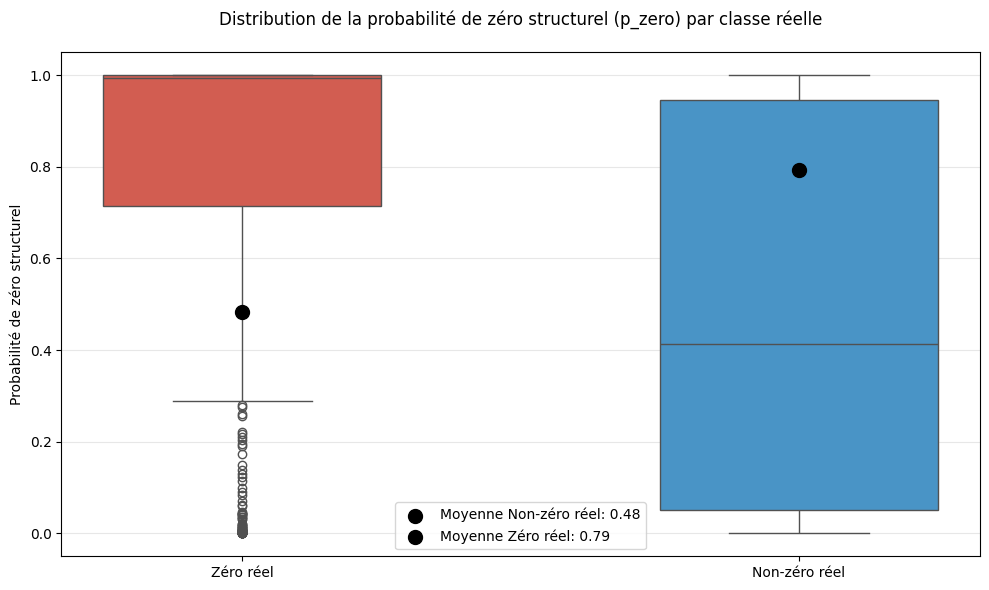


Analyse statistique de p_zero par classe:
               count    mean     std  min     25%     50%     75%  max
Classe réelle                                                         
Non-zéro réel   72.0  0.4842  0.4160  0.0  0.0505  0.4122  0.9462  1.0
Zéro réel      541.0  0.7931  0.3412  0.0  0.7146  0.9945  0.9999  1.0

Rapport de classification (seuil=0.5):
              precision    recall  f1-score   support

    Non-zéro       0.26      0.53      0.35        72
        Zéro       0.93      0.80      0.86       541

    accuracy                           0.77       613
   macro avg       0.59      0.66      0.60       613
weighted avg       0.85      0.77      0.80       613



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# 1. Prédictions du modèle
with torch.no_grad():
    # Ajustement en fonction de ce que ton modèle retourne
    p_zero_test, mu_test = trained_model(X_test_tensor)  # Si le modèle ne retourne que 2 valeurs
    p_zero_test_np = p_zero_test.squeeze().cpu().numpy()  # Conversion en numpy array
    y_test_np = y_test_tensor.cpu().numpy()

# 2. Création du DataFrame pour la visualisation
df_pzero = pd.DataFrame({
    "p_zero": p_zero_test_np,
    "Classe réelle": np.where(y_test_np == 0, "Zéro réel", "Non-zéro réel")
})

# 3. Boxplot amélioré avec les moyennes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Classe réelle", y="p_zero", data=df_pzero, 
                 palette=["#e74c3c", "#3498db"], width=0.5)

# Calcul des moyennes et ajout des points moyens
means = df_pzero.groupby("Classe réelle")["p_zero"].mean()
for i, (cls, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='black', zorder=5, s=100, label=f'Moyenne {cls}: {mean:.2f}')

plt.title("Distribution de la probabilité de zéro structurel (p_zero) par classe réelle", pad=20)
plt.ylabel("Probabilité de zéro structurel")
plt.xlabel("")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Analyse statistique de p_zero
print("\nAnalyse statistique de p_zero par classe:")
stats = df_pzero.groupby("Classe réelle")["p_zero"].describe().round(4)
print(stats)

# 5. Rapport de classification basé sur un seuil de 0.5
y_pred_zero = (p_zero_test_np > 0.5).astype(int)  # Seuil de 0.5 pour prédire les zéros
y_true_zero = (y_test_np == 0).astype(int)  # Conversion des vraies classes de sinistre en 0 et 1

print("\nRapport de classification (seuil=0.5):")
print(classification_report(y_true_zero, y_pred_zero, 
                            target_names=["Non-zéro", "Zéro"]))


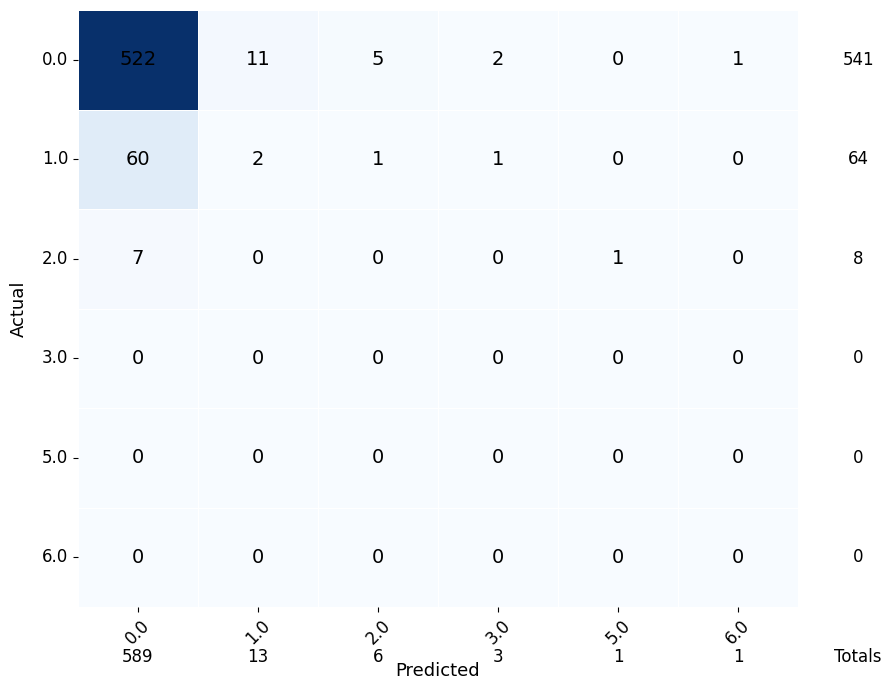


Classification Report:
              precision    recall  f1-score   support

   Class 0.0       0.89      0.96      0.92       541
   Class 1.0       0.15      0.03      0.05        64
   Class 2.0       0.00      0.00      0.00         8
   Class 3.0       0.00      0.00      0.00         0
   Class 5.0       0.00      0.00      0.00         0
   Class 6.0       0.00      0.00      0.00         0

    accuracy                           0.85       613
   macro avg       0.17      0.17      0.16       613
weighted avg       0.80      0.85      0.82       613


Class Distribution:
Class      | Actual     | Predicted  | Correct   
------------------------------------------------------------
0.0        | 541        | 589        | 522       
1.0        | 64         | 13         | 2         
2.0        | 8          | 6          | 0         
3.0        | 0          | 3          | 0         
5.0        | 0          | 1          | 0         
6.0        | 0          | 1          | 0         


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to numpy if they're tensors
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
y_pred_np = y_pred_int.numpy() if isinstance(y_pred_int, torch.Tensor) else y_pred_int

# Get all classes present
classes = np.unique(np.concatenate([y_test_np, y_pred_np]))
classes.sort()

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np, labels=classes)

# Clean Confusion Matrix Visualization
plt.figure(figsize=(9, 7))

# Create clean confusion matrix
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar=False,
    linewidths=0.5, 
    linecolor='white',
    annot_kws={"size": 14, "color": "black"}
)

# Remove all titles and labels we don't need
ax.set_xticklabels(classes, fontsize=12, rotation=45)
ax.set_yticklabels(classes, fontsize=12, rotation=0)
ax.set_xlabel("Predicted", fontsize=13, labelpad=10)
ax.set_ylabel("Actual", fontsize=13, labelpad=10)

# Add clean total labels
for i in range(len(classes)):
    # Right-side totals (actual counts)
    ax.text(
        len(classes)+0.5, i+0.5, 
        f"{cm[i,:].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )
    # Bottom totals (predicted counts)
    ax.text(
        i+0.5, len(classes)+0.5, 
        f"{cm[:,i].sum()}",
        ha='center', 
        va='center', 
        fontsize=12
    )

ax.text(
    len(classes)+0.5, len(classes)+0.5, 
    "Totals",
    ha='center', 
    va='center', 
    fontsize=12
)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test_np, y_pred_np, target_names=[f"Class {c}" for c in classes]))

# Print class distribution
print("\n" + "="*60)
print("Class Distribution:")
print("="*60)
print(f"{'Class':<10} | {'Actual':<10} | {'Predicted':<10} | {'Correct':<10}")
print("-"*60)
for i, cls in enumerate(classes):
    correct = cm[i,i]
    actual = cm[i,:].sum()
    predicted = cm[:,i].sum()
    print(f"{cls:<10} | {actual:<10} | {predicted:<10} | {correct:<10}")


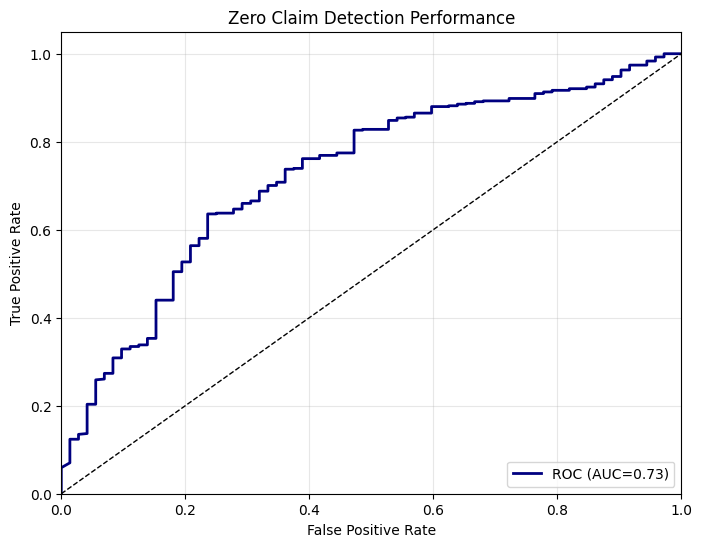

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Get proper predictions
with torch.no_grad():
    p_zero_test = trained_model(X_test_tensor)[0].squeeze().cpu().numpy()
y_test_binary = (y_test_tensor.cpu().numpy() == 0).astype(int)

# 2. Calculate ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, p_zero_test)
roc_auc = auc(fpr, tpr)

# 3. Find optimal threshold (Youden's J)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 4. Plot with clear annotations
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zero Claim Detection Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

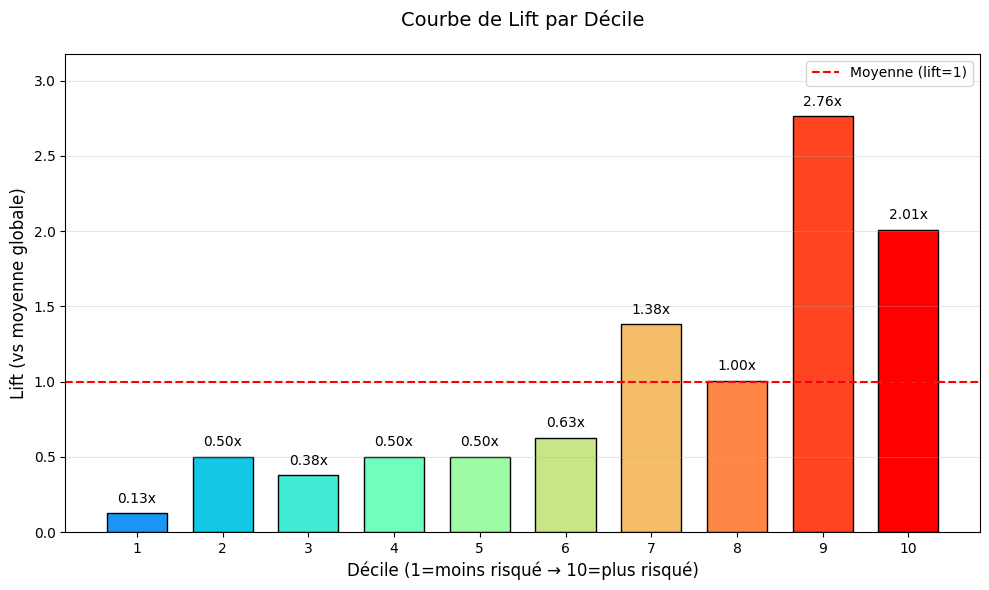

In [ ]:
def calculate_and_plot_lift_vertical(model, X_test, y_test, n_deciles=10):
    """
    Courbe de lift verticale avec déciles 1 (moins bien) à 10 (mieux classés)
    """
    device = next(model.parameters()).device
    X_test = X_test.to(device)
    
    # Prédictions
    model.eval()
    with torch.no_grad():
        p_zero, lambda_ = model(X_test)
        risk_scores = (1 - p_zero) * lambda_
        
    risk_scores = risk_scores.cpu().numpy()
    y_true = y_test.cpu().numpy()
    
    # Tri du MOINS risqué (décile 1) au PLUS risqué (décile 10)
    sorted_indices = np.argsort(risk_scores)  # Ascendant pour 1=moins risqué
    sorted_y_true = y_true[sorted_indices]
    
    # Déciles
    decile_size = len(y_true) // n_deciles
    decile_stats = []
    overall_mean = y_true.mean()
    
    for i in range(n_deciles):
        start = i * decile_size
        end = (i+1) * decile_size
        decile_y_true = sorted_y_true[start:end]
        decile_mean = decile_y_true.mean()
        
        decile_stats.append({
            'decile': i+1,
            'mean_actual': decile_mean,
            'lift': decile_mean / overall_mean
        })
    
    df_lift = pd.DataFrame(decile_stats)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    colors = plt.cm.rainbow(np.linspace(0.2, 1, n_deciles))  # Palette claire
    
    bars = plt.bar(
        df_lift['decile'], 
        df_lift['lift'], 
        color=colors,
        edgecolor='black',
        width=0.7
    )
    
    # Annotations
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.05,
            f'{height:.2f}x',
            ha='center',
            va='bottom',
            fontsize=10
        )
    
    plt.axhline(1, color='red', linestyle='--', label='Moyenne (lift=1)')
    plt.xlabel('Décile (1=moins risqué → 10=plus risqué)', fontsize=12)
    plt.ylabel('Lift (vs moyenne globale)', fontsize=12)
    plt.title('Courbe de Lift par Décile', fontsize=14, pad=20)
    plt.xticks(range(1, n_deciles+1))
    plt.ylim(0, max(df_lift['lift']) * 1.15)
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return df_lift

# Exécution
df_lift = calculate_and_plot_lift_vertical(
    model=results['model'],
    X_test=X_test_tensor,
    y_test=y_test_tensor
)